## Mills ML yield prediction

In [1]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*sklearn.utils.parallel.delayed.*"
)

Morgan fingerprint clustering

In [2]:
import pandas as pd

df_morgan2 = pd.read_csv(r"H:\projects\mills\computational\combined_descriptors\morgan_rad2_reduced_finalDB_with_yields.csv")
df_morgan3 = pd.read_csv(r"H:\projects\mills\computational\combined_descriptors\morgan_rad3_reduced_finalDB_with_yields.csv")

df_morgan2.head()

,InChI,Azo Yield,Azoxy Yield,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,InChI=1S/C10H10N2/c11-8-5-1-3-7-4-2-6-9(12)10(...,0.000000,55.566285,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,InChI=1S/C10H10N2/c11-9-5-1-2-6-10(9)12-7-3-4-...,45.351052,31.603038,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,InChI=1S/C10H10N2S/c1-7-2-4-8(5-3-7)9-6-13-10(...,23.164663,13.912787,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",2.396342,0.459137,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,InChI=1S/C10H11NO4/c1-14-9(12)6-3-4-7(8(11)5-6...,8.968881,1.258160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Morgan fingerprints 2D embedding

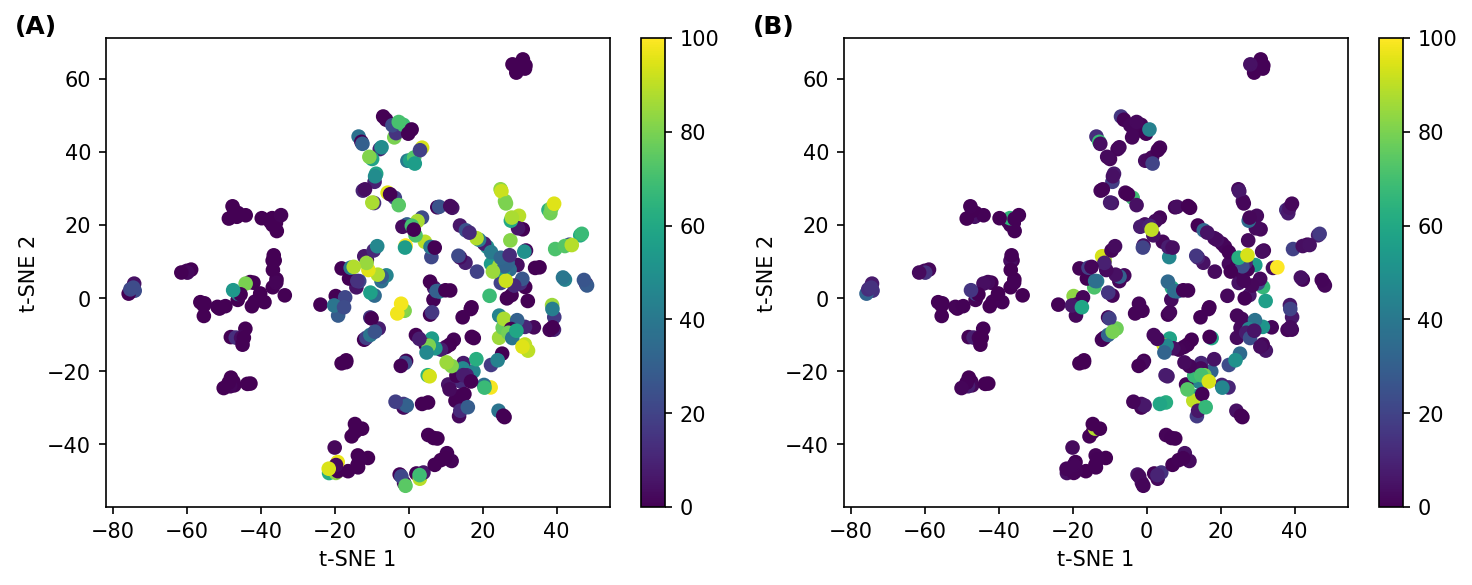

In [3]:
# t-SNE (Morgan fingerprints radius 2)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X_morgan2 = df_morgan2.drop(columns=["InChI", "Azo Yield", "Azoxy Yield"]).values

X_embedded_morgan2 = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X_morgan2)

# yields
y_azo_morgan2 = df_morgan2["Azo Yield"]
y_azoxy_morgan2 = df_morgan2["Azoxy Yield"]

# Plot the 2D visualizations
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

# azo yields
sc1 = axes[0].scatter(
    X_embedded_morgan2[:, 0],
    X_embedded_morgan2[:, 1],
    c=y_azo_morgan2,
    cmap='viridis',
    vmin=0,
    vmax=100
)
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")
axes[0].text(-0.18, 1.05, "(A)", transform=axes[0].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc1, ax=axes[0])

# azoxy yields
sc2 = axes[1].scatter(
    X_embedded_morgan2[:, 0],
    X_embedded_morgan2[:, 1],
    c=y_azoxy_morgan2,
    cmap='viridis',
    vmin=0,
    vmax=100
)
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].text(-0.18, 1.05, "(B)", transform=axes[1].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc2, ax=axes[1])

plt.tight_layout()
plt.show()

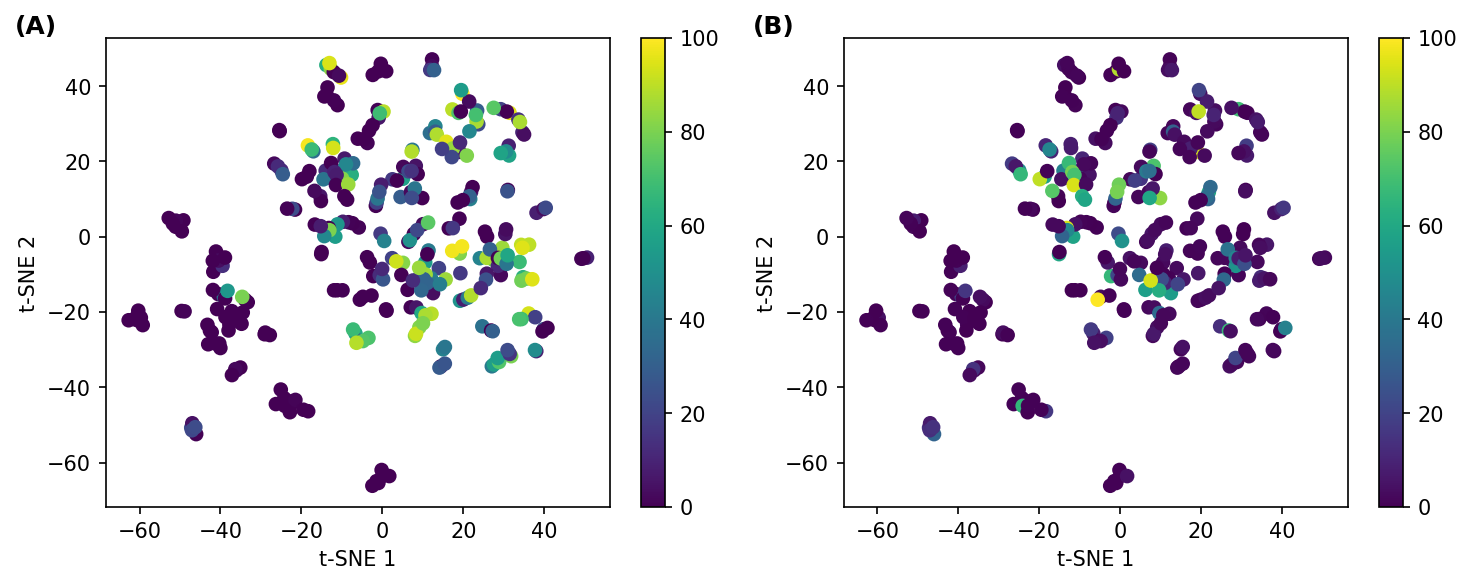

In [4]:
# t-SNE (Morgan fingerprints radius 3)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X_morgan3 = df_morgan3.drop(columns=["InChI", "Azo Yield", "Azoxy Yield"]).values

X_embedded_morgan3 = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X_morgan3)

# yields
y_azo_morgan3 = df_morgan3["Azo Yield"]
y_azoxy_morgan3 = df_morgan3["Azoxy Yield"]

# Plot the 2D visualizations
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

# azo yields
sc1 = axes[0].scatter(
    X_embedded_morgan3[:, 0],
    X_embedded_morgan3[:, 1],
    c=y_azo_morgan3,
    cmap='viridis',
    vmin=0,
    vmax=100
)
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")
axes[0].text(
    -0.18, 1.05, "(A)",
    transform=axes[0].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    ha="left"
)
plt.colorbar(sc1, ax=axes[0])

# azoxy yields
sc2 = axes[1].scatter(
    X_embedded_morgan3[:, 0],
    X_embedded_morgan3[:, 1],
    c=y_azoxy_morgan3,
    cmap='viridis',
    vmin=0,
    vmax=100
)
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].text(
    -0.18, 1.05, "(B)",
    transform=axes[1].transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    ha="left"
)
plt.colorbar(sc2, ax=axes[1])

plt.tight_layout()
plt.show()

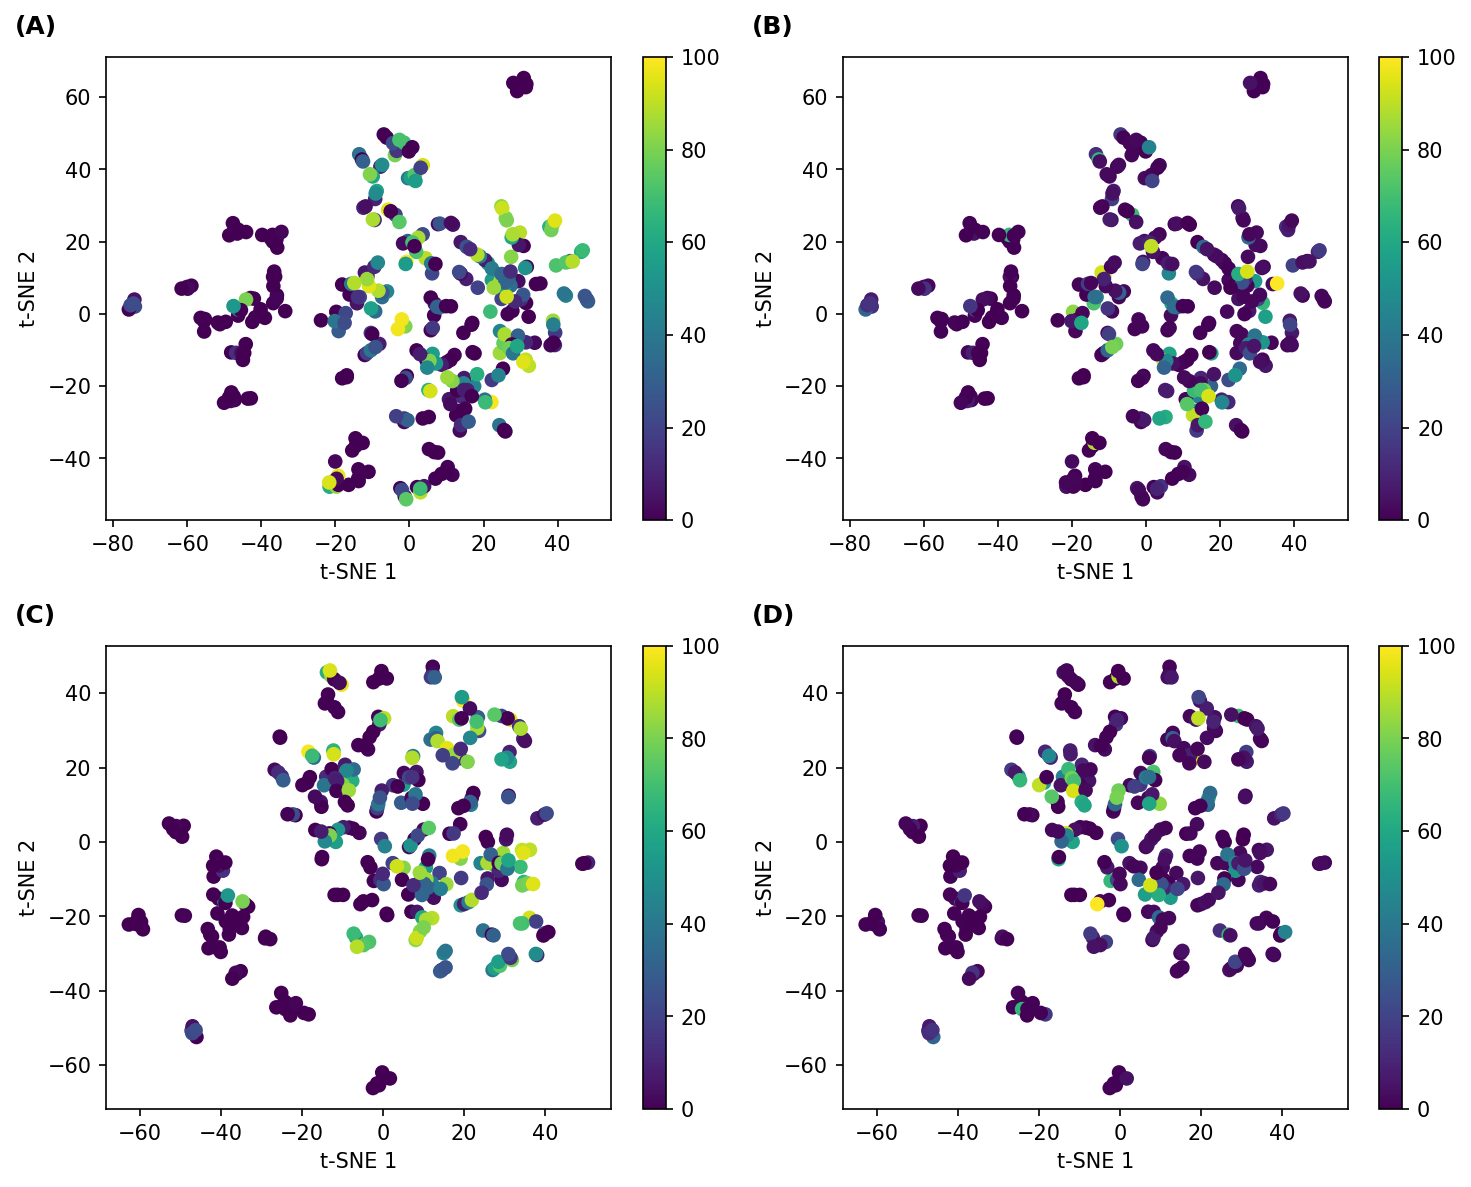

In [5]:
# combine Morgan fingerprint (radius 2, 3; azo, azoxy) plots for final figure

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X_morgan2 = df_morgan2.drop(columns=["InChI", "Azo Yield", "Azoxy Yield"]).values
X_morgan3 = df_morgan3.drop(columns=["InChI", "Azo Yield", "Azoxy Yield"]).values

y_morgan2_azo = df_morgan2["Azo Yield"].values
y_morgan2_azoxy = df_morgan2["Azoxy Yield"].values

y_morgan3_azo = df_morgan3["Azo Yield"].values
y_morgan3_azoxy = df_morgan3["Azoxy Yield"].values

# t-SNE
tsne_morgan2 = TSNE(
    n_components=2,
    perplexity=5,
    random_state=42,
    init="pca",
    learning_rate="auto"
)
tsne_morgan3 = TSNE(
    n_components=2,
    perplexity=5,
    random_state=42,
    init="pca",
    learning_rate="auto"
)

X_embedded_morgan2 = tsne_morgan2.fit_transform(X_morgan2)
X_embedded_morgan3 = tsne_morgan3.fit_transform(X_morgan3)

# -------------------------------
# Plotting
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

# ----- radius 2 -----
# azo yields
sc1 = axes[0, 0].scatter(
    X_embedded_morgan2[:, 0], X_embedded_morgan2[:, 1],
    c=y_morgan2_azo, cmap="viridis", vmin=0, vmax=100
)
axes[0, 0].set_xlabel("t-SNE 1")
axes[0, 0].set_ylabel("t-SNE 2")
axes[0, 0].text(-0.18, 1.05, "(A)", transform=axes[0, 0].transAxes,
                fontsize=12, fontweight="bold")
plt.colorbar(sc1, ax=axes[0, 0])

# azoxy yields
sc2 = axes[0, 1].scatter(
    X_embedded_morgan2[:, 0], X_embedded_morgan2[:, 1],
    c=y_morgan2_azoxy, cmap="viridis", vmin=0, vmax=100
)
axes[0, 1].set_xlabel("t-SNE 1")
axes[0, 1].set_ylabel("t-SNE 2")
axes[0, 1].text(-0.18, 1.05, "(B)", transform=axes[0, 1].transAxes,
                fontsize=12, fontweight="bold")
plt.colorbar(sc2, ax=axes[0, 1])

# ----- radius 3 -----
# azo yields
sc3 = axes[1, 0].scatter(
    X_embedded_morgan3[:, 0], X_embedded_morgan3[:, 1],
    c=y_morgan3_azo, cmap="viridis", vmin=0, vmax=100
)
axes[1, 0].set_xlabel("t-SNE 1")
axes[1, 0].set_ylabel("t-SNE 2")
axes[1, 0].text(-0.18, 1.05, "(C)", transform=axes[1, 0].transAxes,
                fontsize=12, fontweight="bold")
plt.colorbar(sc3, ax=axes[1, 0])

# azoxy yields
sc4 = axes[1, 1].scatter(
    X_embedded_morgan3[:, 0], X_embedded_morgan3[:, 1],
    c=y_morgan3_azoxy, cmap="viridis", vmin=0, vmax=100
)
axes[1, 1].set_xlabel("t-SNE 1")
axes[1, 1].set_ylabel("t-SNE 2")
axes[1, 1].text(-0.18, 1.05, "(D)", transform=axes[1, 1].transAxes,
                fontsize=12, fontweight="bold")
plt.colorbar(sc4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

Data cleaning

The dataframe is a combination of azo(photoswitch) and azoxy yields from 19F qNMR. Along with it are chemical descriptors from RDKit, Mordred, PubChem, xTB, DFT, etc.

In [6]:
# Load full dataset

import pandas as pd

df_initial_raw = pd.read_csv(
    r"H:\projects\mills\Mills_ML\Final_database_with_pKa_with_xtb_with_buriedvol.csv"
)

# drop index column
df_initial = df_initial_raw.drop("Unnamed: 0", axis=1)

print(df_initial.shape)
df_initial.head()

(383, 2842)


,Chemical,InChI,Azo Yield,Azoxy Yield,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,xtb_FOD d proportion__N_max,xtb_FOD d proportion__C_mean,xtb_FOD d proportion__C_min,xtb_FOD d proportion__C_max,xtb_FOD d proportion__H_mean,xtb_FOD d proportion__H_min,xtb_FOD d proportion__H_max,av_N_buried_vol,max_N_buried_vol,min_N_buried_vol
0,"2,2'-ethylenedianiline",InChI=1S/C14H16N2/c15-13-7-3-1-5-11(13)9-10-12...,36.077726,9.546378,5.891506,5.891506,0.858336,0.858336,0.768346,10.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446802,0.463349,0.430256
1,"4,4'-Azodianiline 95% (Titr.) m.p. 245degC",InChI=1S/C12H12N4/c13-9-1-5-11(6-2-9)15-16-12-...,50.244043,3.307967,5.564422,5.564422,0.714291,0.714291,0.591628,10.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294768,0.294802,0.294734
2,2-Amino-5-Bromo-3-nitropyridine,InChI=1S/C5H4BrN3O2/c6-3-1-4(9(10)11)5(7)8-2-3...,0.000000,0.514039,10.238704,10.238704,0.071111,-0.576296,0.568881,9.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355811,0.355811,0.355811
3,o-Phenylenediamine,"InChI=1S/C6H8N2/c7-5-3-1-2-4-6(5)8/h1-4H,7-8H2",7.715487,70.652963,5.394815,5.394815,0.645833,0.645833,0.483927,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323676,0.323676,0.323676
4,"5,6,7,8-tetrahydro-1-naphthylamine",InChI=1S/C10H13N/c11-10-7-3-5-8-4-1-2-6-9(8)10...,12.264539,44.269432,5.841343,5.841343,0.988148,0.988148,0.558928,16.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338442,0.338442,0.338442


In [7]:
# Convert to numeric (non-numeric cells to NaN)

df_numeric = df_initial.copy()

df_numeric = df_numeric.apply(
    lambda col: pd.to_numeric(col, errors="coerce")
)

In [8]:
"""
For oxidation potentials from DFT, both calculations for the neutral/radical cation species are required.
In cases where zero or one of these calculations were successful, the oxidation potentials are nonsensical.
From viewing the data, sensible values are 0 < E_ox < 0.5.
Values outside this range are set to NaN.
"""

import numpy as np

df_numeric_eox = df_numeric.copy()

mask = (df_numeric_eox["Eox_From_Gibbs"] <= 0) | \
       (df_numeric_eox["Eox_From_Gibbs"] >= 0.5)

df_numeric_eox.loc[mask, "Eox_From_Gibbs"] = np.nan

In [9]:
# Find columns that contain NaN values and print the count of NaNs

nan_counts = df_numeric_eox.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values and their counts:")
print(columns_with_nan)

Columns with NaN values and their counts:
Chemical                       383
InChI                          383
ABC                            383
ABCGG                          383
AATS6dv                         20
                              ... 
xtb_FOD d proportion__H_min      4
xtb_FOD d proportion__H_max      4
av_N_buried_vol                  4
max_N_buried_vol                 4
min_N_buried_vol                 4
Length: 1308, dtype: int64


Many of the features have a relatively small number of NaNs, which can be imputed via KNN

In [10]:
# Remove all features with more than 200 values missing (not enough data to be worth including in KNN)

nan_limit = 200

df_nanfiltered = df_numeric_eox.dropna(
    axis=1,
    thresh=len(df_numeric_eox.index) - nan_limit
)

print(df_nanfiltered.shape)
print(df_nanfiltered.size)

# Find columns that contain NaN values and print the count of NaNs
nan_counts = df_nanfiltered.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values and their counts (after removing major NaN columns):")
print(columns_with_nan)

(383, 2607)
998481
Columns with NaN values and their counts (after removing major NaN columns):
AATS6dv                         20
AATS7dv                        147
AATS6d                          20
AATS7d                         147
AATS6s                          20
                              ... 
xtb_FOD d proportion__H_min      4
xtb_FOD d proportion__H_max      4
av_N_buried_vol                  4
max_N_buried_vol                 4
min_N_buried_vol                 4
Length: 1073, dtype: int64


In [11]:
# Use KNN to impute missing values

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# numeric-only (still contains NaNs; just filtered to numeric cols)
df_numeric_only = df_nanfiltered.select_dtypes(include="number").copy()

# feature scaling (for imputation distance metric)
x_scaler = StandardScaler()
df_X_scaled = pd.DataFrame(
    x_scaler.fit_transform(df_numeric_only),
    columns=df_numeric_only.columns,
    index=df_numeric_only.index
)

# KNN imputation on scaled features
knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
df_X_knn_scaled = pd.DataFrame(
    knn_imputer.fit_transform(df_X_scaled),
    columns=df_numeric_only.columns,
    index=df_numeric_only.index
)

print(df_X_knn_scaled.shape)

(383, 2607)


With df_X_KNN_scaled now as our final database, we can start ML

Clustering to view data

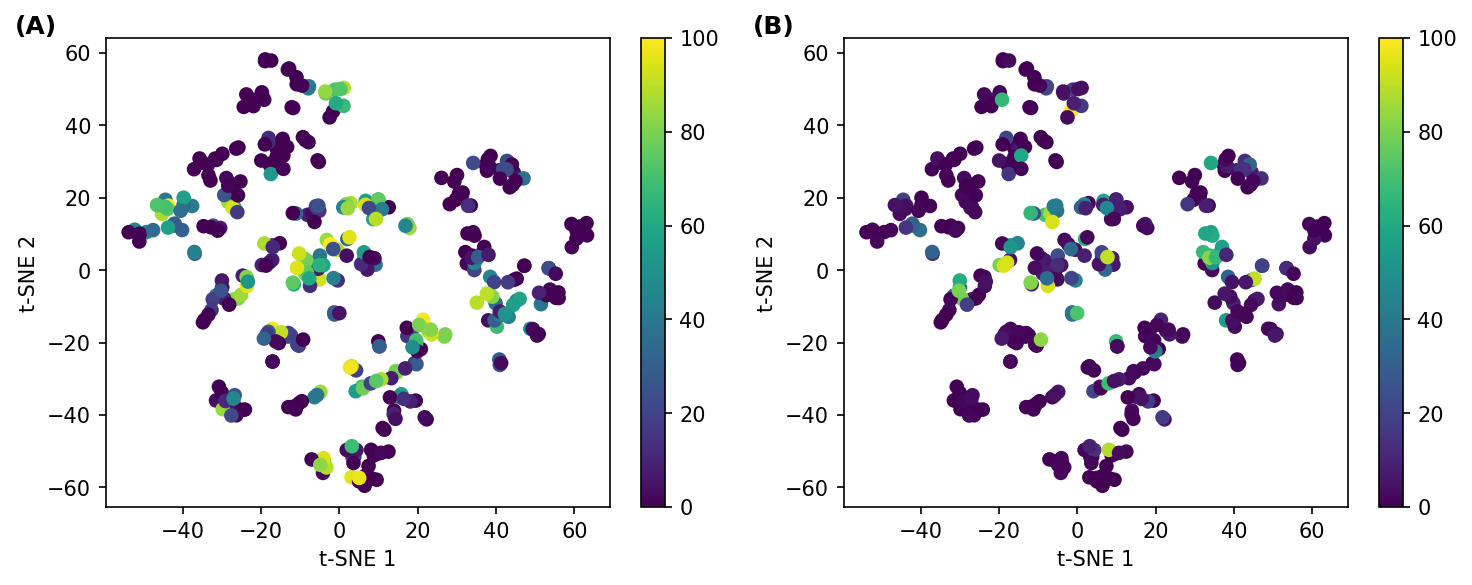

In [12]:
# t-SNE (2D)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X_tsne = df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"]).values
X_embedded_tsne = TSNE(n_components=2, perplexity=7, random_state=42).fit_transform(X_tsne)

# inverse-transform yields only
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
azoxy_idx = df_X_knn_scaled.columns.get_loc("Azoxy Yield")

# inverse scaling (back to original units)
inv_all = x_scaler.inverse_transform(df_X_knn_scaled)
y_azo_tsne = inv_all[:, azo_idx]
y_azoxy_tsne = inv_all[:, azoxy_idx]

# plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

# azo yields
sc1 = axes[0].scatter(
    X_embedded_tsne[:, 0],
    X_embedded_tsne[:, 1],
    c=y_azo_tsne,
    cmap="viridis",
    vmin=0,
    vmax=100
)
axes[0].set_xlabel("t-SNE 1")
axes[0].set_ylabel("t-SNE 2")
axes[0].text(-0.18, 1.05, "(A)", transform=axes[0].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc1, ax=axes[0])

# azoxy yields
sc2 = axes[1].scatter(
    X_embedded_tsne[:, 0],
    X_embedded_tsne[:, 1],
    c=y_azoxy_tsne,
    cmap="viridis",
    vmin=0,
    vmax=100
)
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].text(-0.18, 1.05, "(B)", transform=axes[1].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc2, ax=axes[1])

plt.tight_layout()
plt.show()

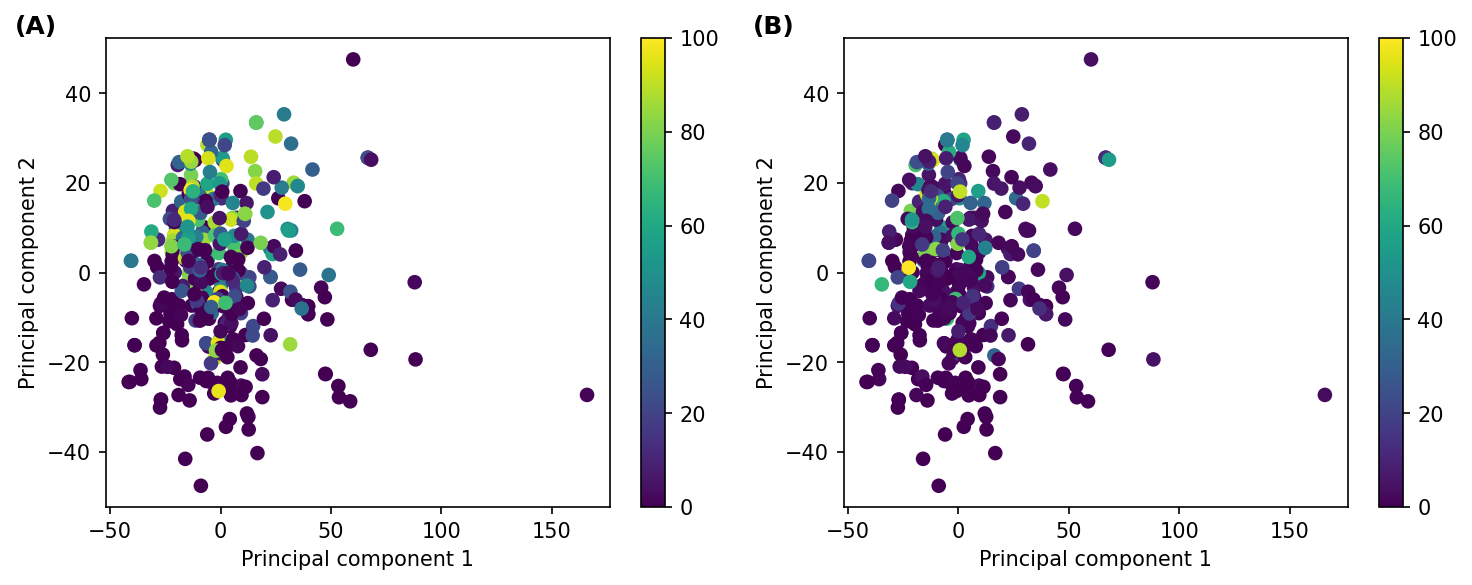

In [13]:
# PCA (2D)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X_pca2 = df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"]).values
X_embedded_pca2 = PCA(n_components=2, random_state=42).fit_transform(X_pca2)

# inverse-transform yields only
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
azoxy_idx = df_X_knn_scaled.columns.get_loc("Azoxy Yield")

inv_all = x_scaler.inverse_transform(df_X_knn_scaled)
y_azo_pca2 = inv_all[:, azo_idx]
y_azoxy_pca2 = inv_all[:, azoxy_idx]

# plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

# azo yields
sc1 = axes[0].scatter(
    X_embedded_pca2[:, 0],
    X_embedded_pca2[:, 1],
    c=y_azo_pca2,
    cmap="viridis",
    vmin=0,
    vmax=100
)
axes[0].set_xlabel("Principal component 1")
axes[0].set_ylabel("Principal component 2")
axes[0].text(-0.18, 1.05, "(A)", transform=axes[0].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc1, ax=axes[0])

# azoxy yields
sc2 = axes[1].scatter(
    X_embedded_pca2[:, 0],
    X_embedded_pca2[:, 1],
    c=y_azoxy_pca2,
    cmap="viridis",
    vmin=0,
    vmax=100
)
axes[1].set_xlabel("Principal component 1")
axes[1].set_ylabel("Principal component 2")
axes[1].text(-0.18, 1.05, "(B)", transform=axes[1].transAxes,
             fontsize=12, fontweight="bold", va="top", ha="left")
plt.colorbar(sc2, ax=axes[1])

plt.tight_layout()
plt.show()

t-SNE shows some clustering with some correlation with reaction yields. PCA shows no clustering

Higher dimensionality reductions

53
83


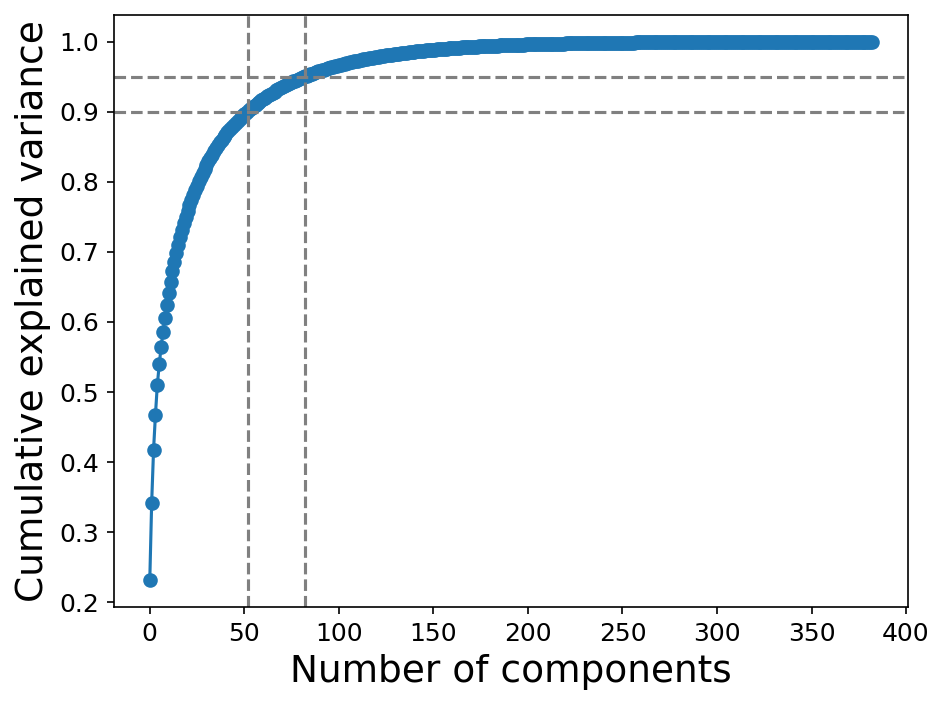

In [14]:
# PCA (cumulative variance)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

X_pca = df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"]).values
pca_full = PCA(random_state=42)
X_pca_scores = pca_full.fit_transform(X_pca)

explained_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# find component indices for 90% and 95%
n_90 = np.argmax(cum_var >= 0.90) + 1
n_95 = np.argmax(cum_var >= 0.95) + 1
print(n_90)
print(n_95)

plt.figure(dpi=150)
plt.plot(cum_var, marker="o")

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.tick_params(axis="both", labelsize=12)

# horizontal reference lines
plt.axhline(0.9, color="gray", linestyle="--")
plt.axhline(0.95, color="gray", linestyle="--")

# vertical reference lines
plt.axvline(n_90 - 1, color="gray", linestyle="--")
plt.axvline(n_95 - 1, color="gray", linestyle="--")

plt.xlabel("Number of components", fontsize=18)
plt.ylabel("Cumulative explained variance", fontsize=18)
plt.tight_layout()
plt.show()

In [15]:
# Prepare dataset for ML using PCA (90% variance)

from sklearn.decomposition import PCA
import pandas as pd

pca_90 = PCA(n_components=0.90, random_state=42)

X_pca_90 = pca_90.fit_transform(
    df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"])
)

# targets (yields)
y_azo_raw = df_X_knn_scaled["Azo Yield"].values
y_azoxy_raw = df_X_knn_scaled["Azoxy Yield"].values

# wrap PCA output in DataFrame (use actual number of components from the fit)
n_pcs_90 = pca_90.n_components_
df_X_pca_90 = pd.DataFrame(
    X_pca_90,
    columns=[f"PC{i+1}" for i in range(n_pcs_90)],
    index=df_X_knn_scaled.index
)

print("Final ML input shape:", df_X_pca_90.shape)

Final ML input shape: (383, 53)


Fitting estimator with 2605 features.
Fitting estimator with 2555 features.
Fitting estimator with 2505 features.
Fitting estimator with 2455 features.
Fitting estimator with 2405 features.
Fitting estimator with 2355 features.
Fitting estimator with 2305 features.
Fitting estimator with 2255 features.
Fitting estimator with 2205 features.
Fitting estimator with 2155 features.
Fitting estimator with 2105 features.
Fitting estimator with 2055 features.
Fitting estimator with 2005 features.
Fitting estimator with 1955 features.
Fitting estimator with 1905 features.
Fitting estimator with 1855 features.
Fitting estimator with 1805 features.
Fitting estimator with 1755 features.
Fitting estimator with 1705 features.
Fitting estimator with 1655 features.
Fitting estimator with 1605 features.
Fitting estimator with 1555 features.
Fitting estimator with 1505 features.
Fitting estimator with 1455 features.
Fitting estimator with 1405 features.
Fitting estimator with 1355 features.
Fitting esti

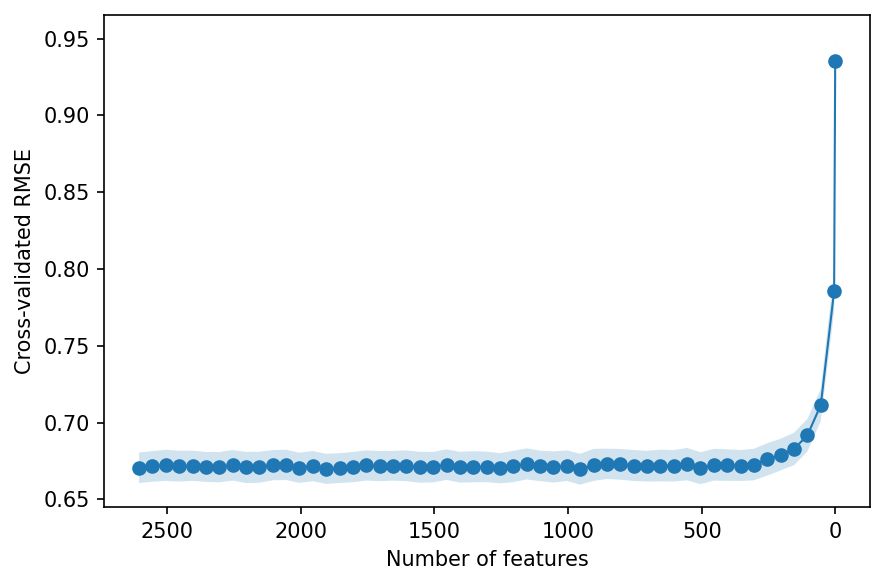

In [16]:
# Coarse RFECV with azo yields + error band (mean +- 1 SEM across CV folds)

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import numpy as np

# data
X_full = df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"])
y_azo = df_X_knn_scaled["Azo Yield"]

# random forest
rf_base = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_features="sqrt",
    min_samples_leaf=3,
    min_samples_split=5,
    max_samples=0.8,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
)

k_folds_coarse = 5
n_repeats_coarse = 5
cv_rep_coarse = RepeatedKFold(n_splits=k_folds_coarse, n_repeats=n_repeats_coarse, random_state=42)
n_splits_total_coarse = k_folds_coarse * n_repeats_coarse

# coarse RFECV
rfecv_coarse_azo = RFECV(
    estimator=rf_base,
    step=50,
    cv=cv_rep_coarse,
    scoring="neg_root_mean_squared_error",
    min_features_to_select=1,
    verbose=1,
    n_jobs=-1,
)

rfecv_coarse_azo.fit(X_full, y_azo)

# plotting
plt.figure(figsize=(6, 4), dpi=150)

cvres_c = rfecv_coarse_azo.cv_results_
n_feat_c = np.asarray(cvres_c["n_features"])
rmse_c = -np.asarray(cvres_c["mean_test_score"])

if "std_test_score" in cvres_c:
    sem_c = np.asarray(cvres_c["std_test_score"]) / np.sqrt(n_splits_total_coarse)
else:
    split_cols = [c for c in cvres_c if c.startswith("split") and c.endswith("_test_score")]
    split_scores = np.vstack([np.asarray(cvres_c[c]) for c in split_cols]).T
    sem_c = split_scores.std(axis=1, ddof=1) / np.sqrt(n_splits_total_coarse)

order = np.argsort(n_feat_c)
n_feat_c, rmse_c, sem_c = n_feat_c[order], rmse_c[order], sem_c[order]

plt.plot(n_feat_c, rmse_c, marker="o", lw=1)
plt.fill_between(n_feat_c, rmse_c - sem_c, rmse_c + sem_c, alpha=0.2)

plt.xlabel("Number of features")
plt.ylabel("Cross-validated RMSE")
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

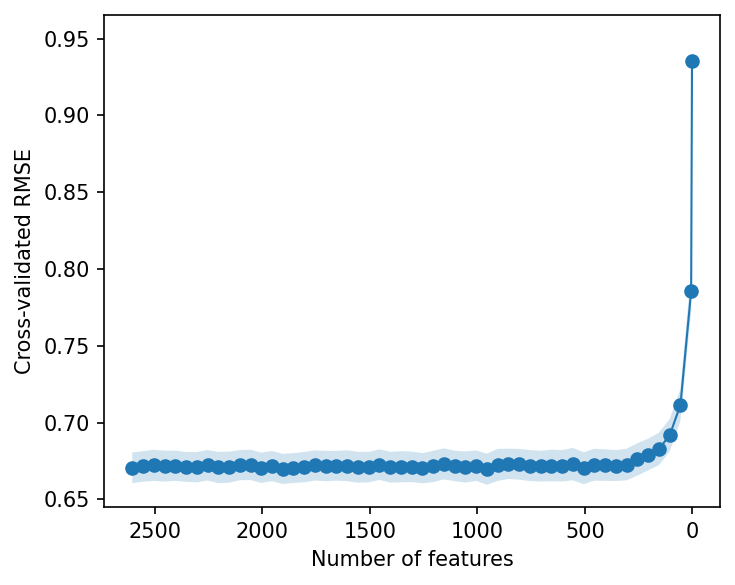

In [17]:
# REPLOTTING for final figure

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4), dpi=150)

cvres_c = rfecv_coarse_azo.cv_results_
n_feat_c = np.asarray(cvres_c["n_features"])
rmse_c = -np.asarray(cvres_c["mean_test_score"])

if "std_test_score" in cvres_c:
    sem_c = np.asarray(cvres_c["std_test_score"]) / np.sqrt(n_splits_total_coarse)
else:
    split_cols = [c for c in cvres_c if c.startswith("split") and c.endswith("_test_score")]
    split_scores = np.vstack([np.asarray(cvres_c[c]) for c in split_cols]).T
    sem_c = split_scores.std(axis=1, ddof=1) / np.sqrt(n_splits_total_coarse)

order = np.argsort(n_feat_c)
n_feat_c, rmse_c, sem_c = n_feat_c[order], rmse_c[order], sem_c[order]

plt.plot(n_feat_c, rmse_c, marker="o", lw=1)
plt.fill_between(n_feat_c, rmse_c - sem_c, rmse_c + sem_c, alpha=0.2)

plt.xlabel("Number of features")
plt.ylabel("Cross-validated RMSE")
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

In [18]:
# RFE to obtain the 300-descriptor subset for fine RFECV

from sklearn.feature_selection import RFE

TARGET_FEATURES = 300

rfe_300 = RFE(
    estimator=rf_base,
    n_features_to_select=TARGET_FEATURES,
    step=50
)

rfe_300.fit(X_full, y_azo)

X_300 = X_full.loc[:, rfe_300.support_]

Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fine RFECV complete.
RFECV optimum n_features_ (for reference): 295


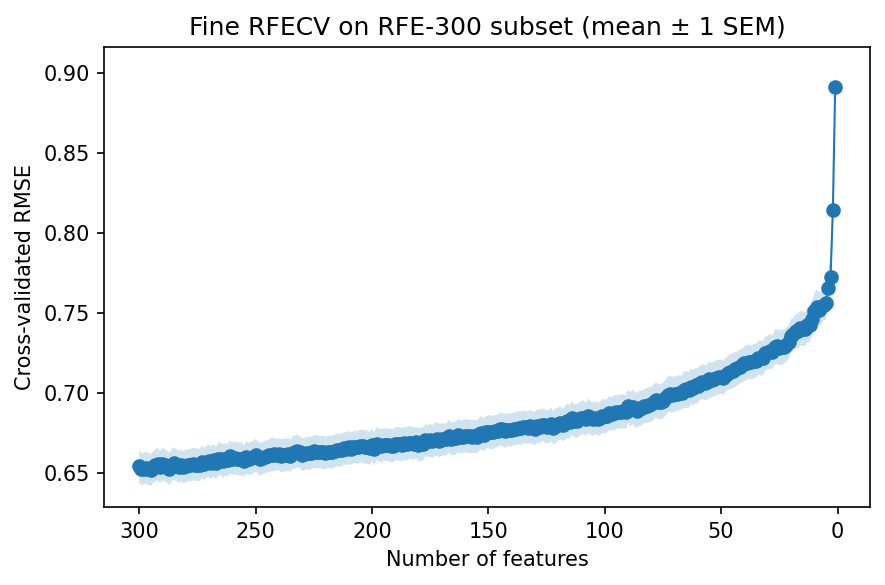

In [19]:
# fine RFECV on the 300-feature subset (mean +- 1 SEM across CV folds)

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np

# Data (use 300-feature RFE output)
X_fine = X_300
y_fine = y_azo

k_folds_fine = 5
n_repeats_fine = 5
cv_rep_fine = RepeatedKFold(n_splits=k_folds_fine, n_repeats=n_repeats_fine, random_state=42)
n_splits_total_fine = k_folds_fine * n_repeats_fine

# fine RFECV
rfecv_fine_azo = RFECV(
    estimator=rf_base,
    step=1,
    cv=cv_rep_fine,
    scoring="neg_root_mean_squared_error",
    min_features_to_select=1,
    verbose=1,
    n_jobs=-1,
)

rfecv_fine_azo.fit(X_fine, y_fine)

print("Fine RFECV complete.")
print("RFECV optimum n_features_ (for reference):", rfecv_fine_azo.n_features_)

# plotting
cvres_f = rfecv_fine_azo.cv_results_
n_feat_f = np.asarray(cvres_f["n_features"])
rmse_f = -np.asarray(cvres_f["mean_test_score"])

if "std_test_score" in cvres_f:
    sem_f = np.asarray(cvres_f["std_test_score"]) / np.sqrt(n_splits_total_fine)
else:
    split_cols = [c for c in cvres_f if c.startswith("split") and c.endswith("_test_score")]
    split_scores = np.vstack([np.asarray(cvres_f[c]) for c in split_cols]).T
    sem_f = split_scores.std(axis=1, ddof=1) / np.sqrt(n_splits_total_fine)

order = np.argsort(n_feat_f)
n_feat_f, rmse_f, sem_f = n_feat_f[order], rmse_f[order], sem_f[order]

plt.figure(figsize=(6, 4), dpi=150)
plt.plot(n_feat_f, rmse_f, marker="o", lw=1)
plt.fill_between(n_feat_f, rmse_f - sem_f, rmse_f + sem_f, alpha=0.2)

plt.xlabel("Number of features")
plt.ylabel("Cross-validated RMSE")
plt.title("Fine RFECV on RFE-300 subset (mean ± 1 SEM)")
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

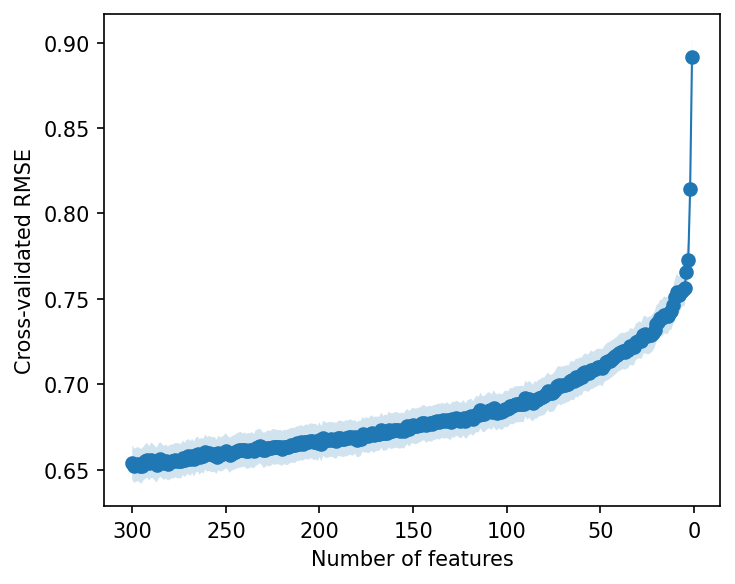

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n_splits_total_fine = rfecv_fine_azo.cv.get_n_splits()

# replotting for final figure (mean +- 1 SEM)
cvres_f = rfecv_fine_azo.cv_results_
n_feat_f = np.asarray(cvres_f["n_features"])
rmse_f = -np.asarray(cvres_f["mean_test_score"])

# SEM across all CV splits
if "std_test_score" in cvres_f:
    sem_f = np.asarray(cvres_f["std_test_score"]) / np.sqrt(n_splits_total_fine)
else:
    split_cols = [c for c in cvres_f if c.startswith("split") and c.endswith("_test_score")]
    split_scores = np.vstack([np.asarray(cvres_f[c]) for c in split_cols]).T
    sem_f = split_scores.std(axis=1, ddof=1) / np.sqrt(n_splits_total_fine)

order = np.argsort(n_feat_f)
n_feat_f, rmse_f, sem_f = n_feat_f[order], rmse_f[order], sem_f[order]

plt.figure(figsize=(5, 4), dpi=150)
plt.plot(n_feat_f, rmse_f, marker="o", lw=1)
plt.fill_between(n_feat_f, rmse_f - sem_f, rmse_f + sem_f, alpha=0.2)

plt.xlabel("Number of features")
plt.ylabel("Cross-validated RMSE")
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

In [21]:
# Final feature selection (manually selecting number of features)

from sklearn.feature_selection import RFE

N_FINAL = 50

# run RFE down to the chosen number of features
rfe_final_azo = RFE(
    estimator=rf_base,
    n_features_to_select=N_FINAL,
    step=1
)

rfe_final_azo.fit(X_fine, y_fine)

# extract final dataset
X_final_azo = X_fine.loc[:, rfe_final_azo.support_]

# sanity checks
print("Final number of features:", X_final_azo.shape[1])
print("Original features:", X_full.shape[1])
print("After coarse RFE (300):", X_300.shape[1])
print("After fine RFE (final):", X_final_azo.shape[1])

# store final feature names
final_feature_names = X_final_azo.columns.tolist()

Final number of features: 50
Original features: 2605
After coarse RFE (300): 300
After fine RFE (final): 50


c:\Users\hamis\miniconda3\envs\test\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Feature,Permutation importance (ΔRMSE),Std (ΔRMSE)
0,MullikenAtomSpinPopH2,0.030016,0.003367
1,xtb_Disp. coeff. C6__H_min,0.029018,0.002971
2,xtb_Polariz. alpha__H_min,0.026054,0.002660
3,xtb_Partial charge__H_max,0.025517,0.002851
4,xtb_Electrophilic descrip.,0.023102,0.001936
5,xtb_SMR_VSA7,0.022772,0.002366
6,LoewdinAtomChargeN_x,0.022037,0.002218
7,MullikenOrbitalSpinH2s,0.021134,0.002406
8,MayerTotValenceN_y,0.020510,0.001580
9,H2IsoShielding_x,0.019783,0.001887


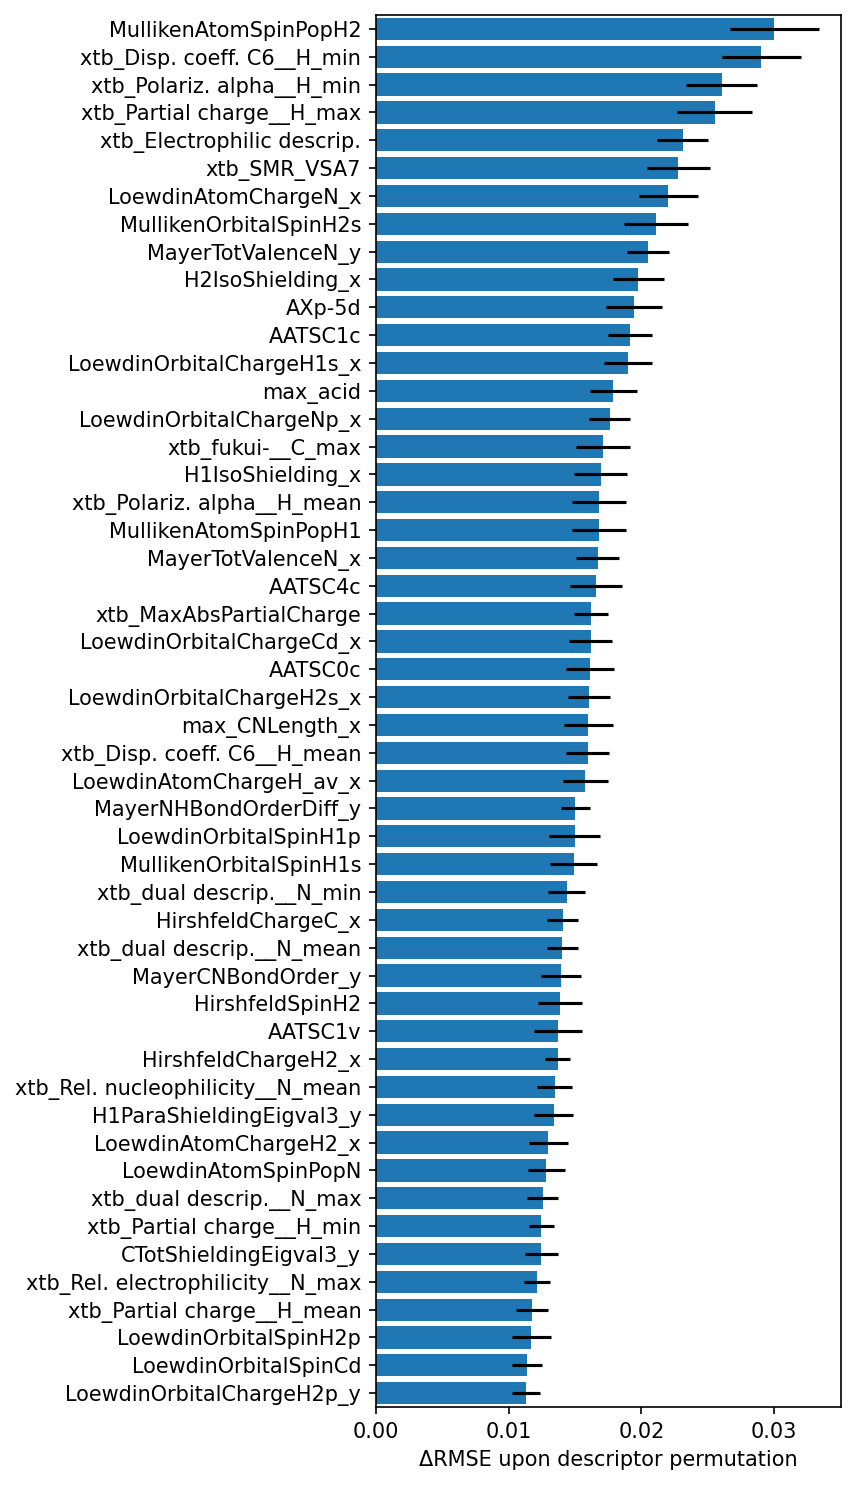

In [22]:
# Permutation importance for final features (RFE-selected)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# use the fitted estimator inside RFE (trained on the selected features)
rf_final = rfe_final_azo.estimator_

# permutation importance (RMSE)
perm = permutation_importance(
    rf_final,
    X_final_azo,
    y_fine,
    n_repeats=30,
    random_state=42,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# convert to delta RMSE (positive = worse when permuted)
delta_rmse_mean = perm.importances_mean
delta_rmse_std = perm.importances_std

perm_df = pd.DataFrame({
    "Feature": X_final_azo.columns,
    "Permutation importance (ΔRMSE)": delta_rmse_mean,
    "Std (ΔRMSE)": delta_rmse_std
}).sort_values("Permutation importance (ΔRMSE)", ascending=False).reset_index(drop=True)

display(perm_df)

# plotting
plt.figure(figsize=(6, 10), dpi=150)

y_pos = range(len(perm_df))

plt.barh(
    y_pos,
    perm_df["Permutation importance (ΔRMSE)"],
    xerr=perm_df["Std (ΔRMSE)"]
)

plt.yticks(y_pos, perm_df["Feature"])
plt.xlabel("ΔRMSE upon descriptor permutation")
plt.ylim(-0.5, len(perm_df) - 0.5)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Train-test split

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_STATE = 42

X_all = df_X_knn_scaled.drop(columns=["Azo Yield", "Azoxy Yield"]).values

# target: azo yields
y_all = df_X_knn_scaled["Azo Yield"].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_all,
    y_all,
    test_size=0.2,
    random_state=RANDOM_STATE,
    shuffle=True
)

print("Split shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Split shapes:
X_train: (306, 2605) X_test: (77, 2605)
y_train: (306,) y_test: (77,)


In [24]:
# for inverse scaling

import numpy as np

# get indices of the yield columns in df_X_knn_scaled
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
azoxy_idx = df_X_knn_scaled.columns.get_loc("Azoxy Yield")

# y_mean/y_std must match the scaler used to scale df_numeric_only / df_X_scaled
y_mean = float(x_scaler.mean_[azo_idx])
y_std  = float(x_scaler.scale_[azo_idx])

# azoxy
y_mean_azoxy = float(x_scaler.mean_[azoxy_idx])
y_std_azoxy  = float(x_scaler.scale_[azoxy_idx])

print("Using scaler params for inverse scaling:")
print("Azo:", y_mean, y_std)

Using scaler params for inverse scaling:
Azo: 26.825928104383813 32.48300866385054


Null models

In [25]:
"""
Null model for yield prediction
Predicts the mean training yield for all points
Outputs MAE / RMSE / R2 for:
1) 5-fold CV on training split
2) held-out test set
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RANDOM_STATE = 42

y_train_azo_scaled = y_train
y_test_azo_scaled = y_test

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# 5-fold CV on train split

cv_null = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_null_mae, cv_null_rmse, cv_null_r2 = [], [], []

for train_idx, val_idx in cv_null.split(y_train):
    y_tr = y_train[train_idx]
    y_val = y_train[val_idx]

    y_pred_val = np.full_like(y_val, fill_value=np.mean(y_tr), dtype=float)

    mae, rmse, r2 = regression_metrics(y_val, y_pred_val)
    cv_null_mae.append(mae)
    cv_null_rmse.append(rmse)
    cv_null_r2.append(r2)

print("Null model (mean of training fold) — 5-fold CV on training split (SCALED):")
print(f"  MAE : {np.mean(cv_null_mae):.4f} ± {np.std(cv_null_mae):.4f}")
print(f"  RMSE: {np.mean(cv_null_rmse):.4f} ± {np.std(cv_null_rmse):.4f}")
print(f"  R2  : {np.mean(cv_null_r2):.4f} ± {np.std(cv_null_r2):.4f}")


# held-out test set

y_pred_test = np.full_like(y_test, fill_value=np.mean(y_train), dtype=float)
mae_s, rmse_s, r2_s = regression_metrics(y_test, y_pred_test)

print("\nNull model — held-out test set (SCALED):")
print(f"  MAE : {mae_s:.4f}")
print(f"  RMSE: {rmse_s:.4f}")
print(f"  R2  : {r2_s:.4f}")


# inverse-scale to real yield units
# y_real = y_scaled * y_std + y_mean

do_inverse_scale = "y_mean" in globals() and "y_std" in globals()

if do_inverse_scale:
    # CV (inverse-scaled)
    cv_null_mae_r, cv_null_rmse_r, cv_null_r2_r = [], [], []
    for train_idx, val_idx in cv_null.split(y_train):
        y_tr = y_train[train_idx]
        y_val = y_train[val_idx]

        y_pred_val = np.full_like(y_val, fill_value=np.mean(y_tr), dtype=float)

        y_val_real = y_val * y_std + y_mean
        y_pred_real = y_pred_val * y_std + y_mean

        mae, rmse, r2 = regression_metrics(y_val_real, y_pred_real)
        cv_null_mae_r.append(mae)
        cv_null_rmse_r.append(rmse)
        cv_null_r2_r.append(r2)

    print("\nNull model — 5-fold CV on training split (INVERSE-SCALED, real yield units):")
    print(f"  MAE : {np.mean(cv_null_mae_r):.3f} ± {np.std(cv_null_mae_r):.3f}")
    print(f"  RMSE: {np.mean(cv_null_rmse_r):.3f} ± {np.std(cv_null_rmse_r):.3f}")
    print(f"  R2  : {np.mean(cv_null_r2_r):.3f} ± {np.std(cv_null_r2_r):.3f}")

    # test (inverse-scaled)
    y_test_real = y_test * y_std + y_mean
    y_pred_test_real = y_pred_test * y_std + y_mean
    mae_r, rmse_r, r2_r = regression_metrics(y_test_real, y_pred_test_real)

    print("\nNull model — held-out test set (INVERSE-SCALED, real yield units):")
    print(f"  MAE : {mae_r:.3f}")
    print(f"  RMSE: {rmse_r:.3f}")
    print(f"  R2  : {r2_r:.3f}")

Null model (mean of training fold) — 5-fold CV on training split (SCALED):
  MAE : 0.8431 ± 0.0630
  RMSE: 0.9907 ± 0.1125
  R2  : -0.0858 ± 0.1241

Null model — held-out test set (SCALED):
  MAE : 0.8927
  RMSE: 1.0536
  R2  : -0.0217

Null model — 5-fold CV on training split (INVERSE-SCALED, real yield units):
  MAE : 27.386 ± 2.046
  RMSE: 32.181 ± 3.655
  R2  : -0.086 ± 0.124

Null model — held-out test set (INVERSE-SCALED, real yield units):
  MAE : 28.997
  RMSE: 34.225
  R2  : -0.022


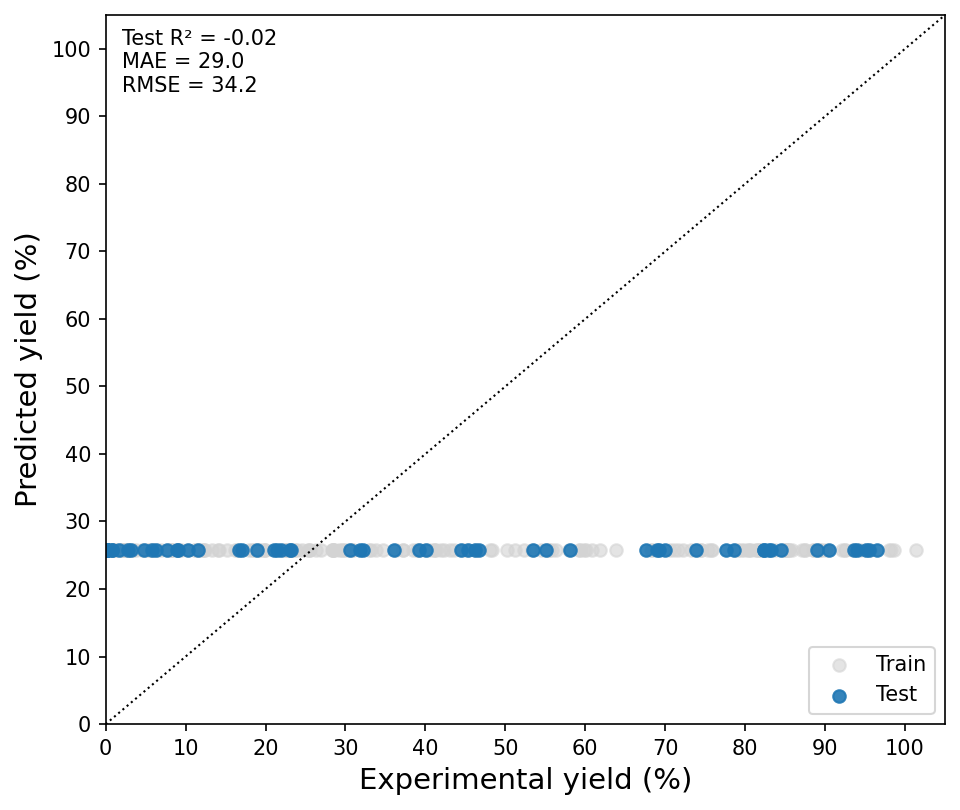

In [26]:
# ================================
# Plot predicted vs experimental yields (mean baseline null model)
# Uses: y_train_azo_scaled, y_test_azo_scaled, inv_azo()
# ================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# inverse-scaling
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
y_mean_azo = float(x_scaler.mean_[azo_idx])
y_std_azo = float(x_scaler.scale_[azo_idx])

def inv_azo(y_scaled):
    return y_scaled * y_std_azo + y_mean_azo

# Baseline prediction is constant = mean of TRAIN (scaled space)
y_pred_train_scaled = np.full_like(y_train_azo_scaled, fill_value=np.mean(y_train_azo_scaled), dtype=float)
y_pred_test_scaled  = np.full_like(y_test_azo_scaled,  fill_value=np.mean(y_train_azo_scaled), dtype=float)

# Inverse scaling to real units
y_train_true_real = inv_azo(y_train_azo_scaled)
y_test_true_real  = inv_azo(y_test_azo_scaled)

y_train_pred_real = inv_azo(y_pred_train_scaled)
y_test_pred_real  = inv_azo(y_pred_test_scaled)

# Test metrics (real units)
r2 = r2_score(y_test_true_real, y_test_pred_real)
mae = mean_absolute_error(y_test_true_real, y_test_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_true_real, y_test_pred_real))

# Plot
plt.figure(figsize=(6.5, 5.5), dpi=150)

# Train
plt.scatter(
    y_train_true_real, y_train_pred_real,
    color="lightgray", alpha=0.6, label="Train"
)

# Test
plt.scatter(
    y_test_true_real, y_test_pred_real,
    color="tab:blue", alpha=0.9, label="Test"
)

# 1:1 line
lims = [0, 105]
plt.plot(lims, lims, "k:", lw=1)

plt.xlim(lims)
plt.ylim(lims)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

plt.xlabel("Experimental yield (%)", fontsize=14)
plt.ylabel("Predicted yield (%)", fontsize=14)

plt.text(
    0.02, 0.98,
    f"Test R² = {r2:.2f}\nMAE = {mae:.1f}\nRMSE = {rmse:.1f}",
    transform=plt.gca().transAxes,
    va="top", ha="left"
)

plt.legend(frameon=True)
plt.tight_layout()
plt.show()


In [27]:
"""
Alternative null model for yield prediction
Spline model for Eox vs yield
Outputs MAE / RMSE / R2 for:
1) 5-fold CV on training split
2) held-out test set
"""

import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RANDOM_STATE = 42

# data
X_all_eox = df_X_knn_scaled[["Eox_From_Gibbs"]].values
y_all_azo = df_X_knn_scaled["Azo Yield"].values

X_train_eox, X_test_eox, y_train_azo_scaled, y_test_azo_scaled = train_test_split(
    X_all_eox,
    y_all_azo,
    test_size=0.2,
    random_state=RANDOM_STATE,
    shuffle=True,
)

# model: spline + ridge
model_eox_spline = Pipeline([
    ("spline", SplineTransformer(
        n_knots=8,
        degree=3,
        include_bias=False
    )),
    ("ridge", Ridge(alpha=1.0, random_state=RANDOM_STATE))
])

# CV performance
cv5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scores = cross_validate(
    model_eox_spline,
    X_train_eox,
    y_train_azo_scaled,
    cv=cv5,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    n_jobs=-1
)

print("Eox-only spline model — 5-fold CV on training split (SCALED):")
print(f"  R2   : {scores['test_r2'].mean():.3f} ± {scores['test_r2'].std():.3f}")
print(f"  MAE  : {-scores['test_neg_mean_absolute_error'].mean():.3f} ± "
      f"{(-scores['test_neg_mean_absolute_error']).std():.3f}")
print(f"  RMSE : {-scores['test_neg_root_mean_squared_error'].mean():.3f} ± "
      f"{(-scores['test_neg_root_mean_squared_error']).std():.3f}")

# inverse-scaling
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
y_mean_azo = float(x_scaler.mean_[azo_idx])
y_std_azo = float(x_scaler.scale_[azo_idx])

def inv_azo(y_scaled):
    return y_scaled * y_std_azo + y_mean_azo

# manual CV loop (real-unit metrics)
mae_real, rmse_real, r2_real = [], [], []

for tr_idx, val_idx in cv5.split(X_train_eox):
    X_tr, X_val = X_train_eox[tr_idx], X_train_eox[val_idx]
    y_tr, y_val = y_train_azo_scaled[tr_idx], y_train_azo_scaled[val_idx]

    model_eox_spline.fit(X_tr, y_tr)
    y_pred = model_eox_spline.predict(X_val)

    y_val_real = inv_azo(y_val)
    y_pred_real = inv_azo(y_pred)

    mae_real.append(mean_absolute_error(y_val_real, y_pred_real))
    rmse_real.append(np.sqrt(mean_squared_error(y_val_real, y_pred_real)))
    r2_real.append(r2_score(y_val_real, y_pred_real))

print("\nEox-only spline model — 5-fold CV on training split (REAL units):")
print(f"  MAE  : {np.mean(mae_real):.2f} ± {np.std(mae_real):.2f}")
print(f"  RMSE : {np.mean(rmse_real):.2f} ± {np.std(rmse_real):.2f}")
print(f"  R2   : {np.mean(r2_real):.3f} ± {np.std(r2_real):.3f}")

# Final fit + held-out test set
model_eox_spline.fit(X_train_eox, y_train_azo_scaled)
y_pred_test_scaled = model_eox_spline.predict(X_test_eox)

y_test_real = inv_azo(y_test_azo_scaled)
y_pred_real = inv_azo(y_pred_test_scaled)

print("\nEox-only spline model — held-out test set (REAL units):")
print(f"  MAE  : {mean_absolute_error(y_test_real, y_pred_real):.2f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test_real, y_pred_real)):.2f}")
print(f"  R2   : {r2_score(y_test_real, y_pred_real):.3f}")

Eox-only spline model — 5-fold CV on training split (SCALED):
  R2   : 0.130 ± 0.194
  MAE  : 0.674 ± 0.038
  RMSE : 0.877 ± 0.066

Eox-only spline model — 5-fold CV on training split (REAL units):
  MAE  : 21.90 ± 1.24
  RMSE : 28.48 ± 2.14
  R2   : 0.130 ± 0.194

Eox-only spline model — held-out test set (REAL units):
  MAE  : 26.08
  RMSE : 33.53
  R2   : 0.020


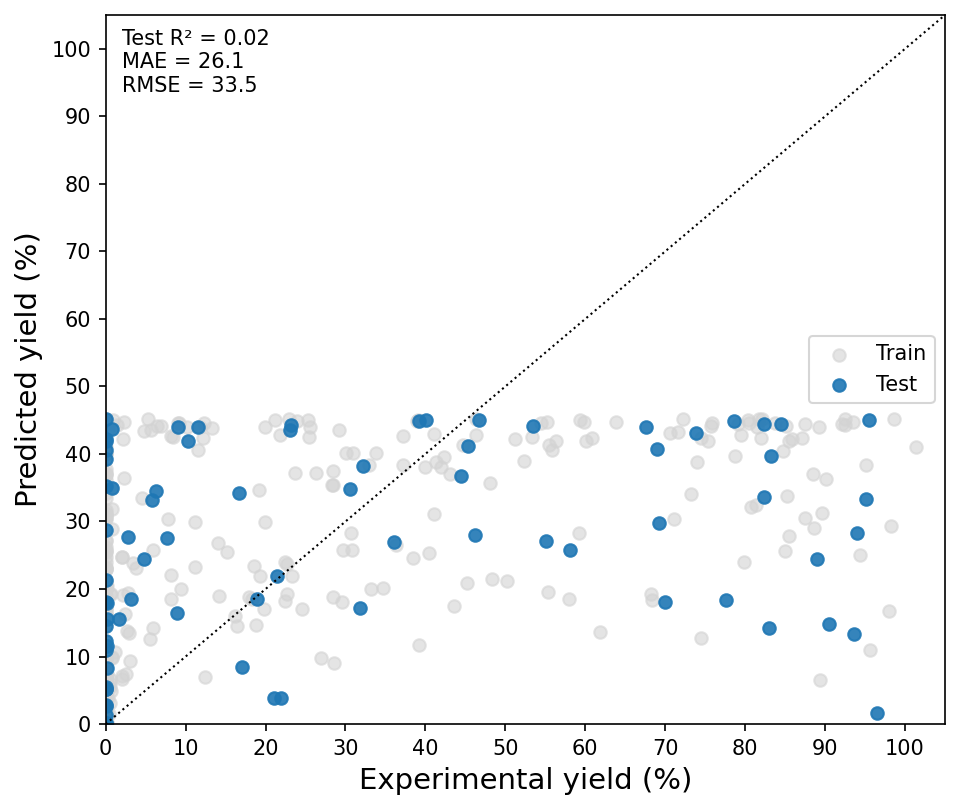

In [28]:
# ================================
# Plot predicted vs experimental yields (Eox-only spline model)
# Uses: model_eox_spline, X_train_eox/X_test_eox, y_train_azo_scaled/y_test_azo_scaled, inv_azo
# ================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict (scaled -> real) for train + test
y_train_pred_real = inv_azo(model_eox_spline.predict(X_train_eox))
y_test_pred_real  = inv_azo(model_eox_spline.predict(X_test_eox))

y_train_true_real = inv_azo(y_train_azo_scaled)
y_test_true_real  = inv_azo(y_test_azo_scaled)

# Test metrics (real units)
r2 = r2_score(y_test_true_real, y_test_pred_real)
mae = mean_absolute_error(y_test_true_real, y_test_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_true_real, y_test_pred_real))

# Plot
plt.figure(figsize=(6.5, 5.5), dpi=150)

# Train
plt.scatter(
    y_train_true_real, y_train_pred_real,
    color="lightgray", alpha=0.6, label="Train"
)

# Test
plt.scatter(
    y_test_true_real, y_test_pred_real,
    color="tab:blue", alpha=0.9, label="Test"
)

# 1:1 line
lims = [0, 105]
plt.plot(lims, lims, "k:", lw=1)

plt.xlim(lims)
plt.ylim(lims)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

plt.xlabel("Experimental yield (%)", fontsize=14)
plt.ylabel("Predicted yield (%)", fontsize=14)

plt.text(
    0.02, 0.98,
    f"Test R² = {r2:.2f}\nMAE = {mae:.1f}\nRMSE = {rmse:.1f}",
    transform=plt.gca().transAxes,
    va="top", ha="left"
)

plt.legend(frameon=True)
plt.tight_layout()
plt.show()

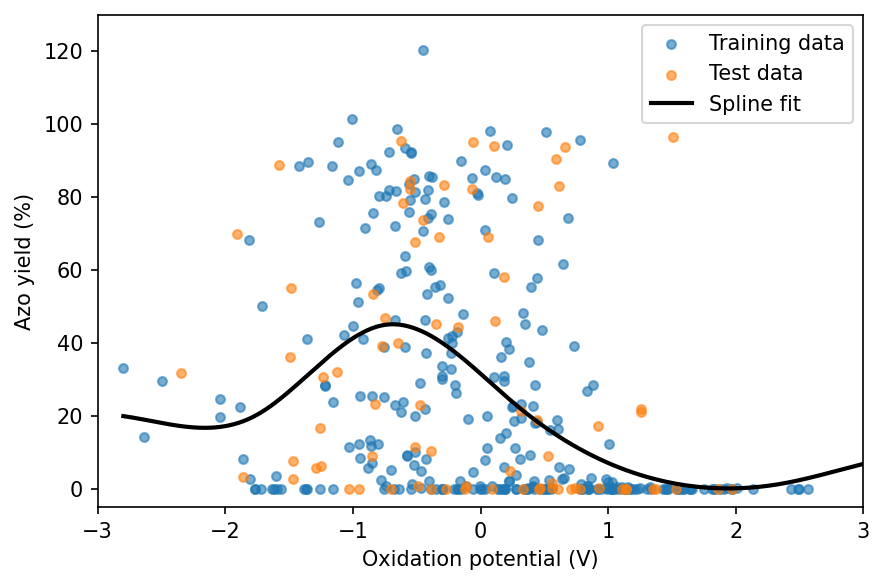

In [29]:
# =========================================
# Plot spline fit: Eox vs Azo Yield
# =========================================

import numpy as np
import matplotlib.pyplot as plt

# Generate smooth Eox grid across observed range
eox_min = df_X_knn_scaled["Eox_From_Gibbs"].min()
eox_max = df_X_knn_scaled["Eox_From_Gibbs"].max()

X_grid = np.linspace(eox_min, eox_max, 400).reshape(-1, 1)

# Predict spline (scaled)
y_grid_scaled = model_eox_spline.predict(X_grid)

# Inverse-scale to real yield units
y_grid_real = inv_azo(y_grid_scaled)

# Plot
plt.figure(figsize=(6, 4), dpi=150)

# Training data
plt.scatter(
    X_train_eox.ravel(),
    inv_azo(y_train_azo_scaled),
    s=18,
    alpha=0.6,
    label="Training data"
)

# Test data
plt.scatter(
    X_test_eox.ravel(),
    inv_azo(y_test_azo_scaled),
    s=18,
    alpha=0.6,
    label="Test data"
)

# Spline fit
plt.plot(
    X_grid.ravel(),
    y_grid_real,
    color="black",
    lw=2,
    label="Spline fit"
)

plt.xlabel("Oxidation potential (V)")
plt.ylabel("Azo yield (%)")
plt.xlim(-3,3)
plt.ylim(-5,130)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

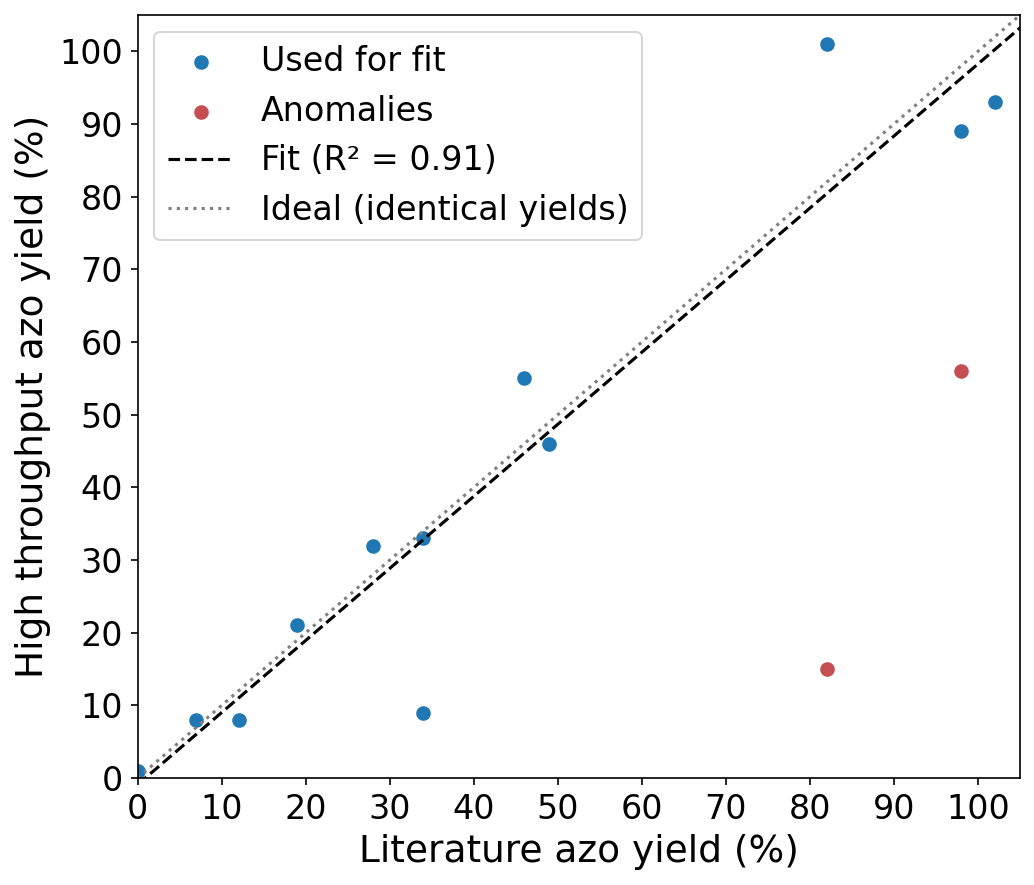

In [30]:
# Comparison of HTE reaction yields to oxidation potentials literature paper

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker

# literature data
lit_yield = np.array([
    34, 28, 7, 46, 34, 98, 87, 82, 95, 85,
    77, 98, 102, 82, 49, 12, 101, 64, 19, 0
])

# high-throughput data
hte_yield = np.array([
    33, 32, 8, 55, 9, 89, np.nan, 101, np.nan, np.nan,
    np.nan, 56, 93, 15, 46, 8, np.nan, np.nan, 21, 1
])

# remove missing values
mask = ~np.isnan(hte_yield)
x = lit_yield[mask]
y = hte_yield[mask]


# manually select anomalies
anomaly_idx = [7, 9]

is_anomaly = np.zeros(len(x), dtype=bool)
is_anomaly[anomaly_idx] = True

# fit excluding anomalies
x_fit = x[~is_anomaly]
y_fit = y[~is_anomaly]

linreg_lit_hte = LinearRegression()
linreg_lit_hte.fit(x_fit.reshape(-1,1), y_fit)
r2 = r2_score(y_fit, linreg_lit_hte.predict(x_fit.reshape(-1,1)))

# plotting
plt.figure(figsize=(7,6), dpi=150)

# inliers
plt.scatter(
    x_fit, y_fit,
    color="tab:blue",
    label="Used for fit",
    zorder=2
)

# anomalies
plt.scatter(
    x[is_anomaly], y[is_anomaly],
    color="#C44E52",
    label="Anomalies",
    zorder=3
)

# fit line
x_line = np.linspace(0, 110, 200)
y_line = linreg_lit_hte.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, "--", color="black", label=f"Fit (R² = {r2:.2f})")

# ideal yields
plt.plot([0, 110], [0, 110], ":", color="gray", label="Ideal (identical yields)")

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel("Literature azo yield (%)",  fontsize=18)
plt.ylabel("High throughput azo yield (%)",  fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

Random Forests

In [31]:
# Near-default random forest on PCA feature space (predict azo yields)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RANDOM_STATE = 42
TEST_SIZE = 0.20
N_JOBS = -1

# data
X_pca90 = df_X_pca_90.values
y_azo_scaled_all = df_X_knn_scaled["Azo Yield"].values

# train/test split
X_train_pca, X_test_pca, y_train_azo_scaled, y_test_azo_scaled = train_test_split(
    X_pca90,
    y_azo_scaled_all,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=True
)

# Inverse-scaling parameters for azo yields
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
y_mean_azo = float(x_scaler.mean_[azo_idx])
y_std_azo = float(x_scaler.scale_[azo_idx])

def inv_azo(y_scaled):
    return y_scaled * y_std_azo + y_mean_azo

# random forest
rf_pca = RandomForestRegressor(
    n_estimators=1000,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
)

# 5-fold CV on training set
cv5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    "r2": "r2",
    "neg_mae": "neg_mean_absolute_error",
    "neg_rmse": "neg_root_mean_squared_error",
}

cv_results = cross_validate(
    rf_pca,
    X_train_pca,
    y_train_azo_scaled,
    cv=cv5,
    scoring=scoring,
    n_jobs=N_JOBS
)

print("5-fold CV (train split only, SCALED):")
print(f"  MAE  : {-cv_results['test_neg_mae'].mean():.3f} ± {(-cv_results['test_neg_mae']).std():.3f}")
print(f"  RMSE : {-cv_results['test_neg_rmse'].mean():.3f} ± {(-cv_results['test_neg_rmse']).std():.3f}")
print(f"  R2   : {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")

# Fit + held-out test evaluation
rf_pca.fit(X_train_pca, y_train_azo_scaled)
y_pred_test_scaled = rf_pca.predict(X_test_pca)

y_test_real = inv_azo(y_test_azo_scaled)
y_pred_real = inv_azo(y_pred_test_scaled)

r2 = r2_score(y_test_real, y_pred_real)
mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print("\nHeld-out test set (REAL units):")
print(f"  MAE  : {mae:.3f}")
print(f"  RMSE : {rmse:.3f}")
print(f"  R2   : {r2:.3f}")

5-fold CV (train split only, SCALED):
  MAE  : 0.558 ± 0.041
  RMSE : 0.732 ± 0.073
  R2   : 0.367 ± 0.273

Held-out test set (REAL units):
  MAE  : 19.976
  RMSE : 25.305
  R2   : 0.441


In [32]:
# coarse random forest parameter search

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

RANDOM_STATE = 42
N_JOBS = -1

# parameter search based on training data
X_search = X_train_pca
y_search = y_train_azo_scaled

# random forest
rf_base_pca = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

# parameter search space
param_dist = {
    "n_estimators": [1000],
    "max_depth": [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["sqrt", "log2", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

# RMSE scorer
rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

# CV
cv5 = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# randomised search
search_rf_pca = RandomizedSearchCV(
    rf_base_pca,
    param_distributions=param_dist,
    n_iter=40,
    scoring=rmse_scorer,
    cv=cv5,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    refit=True
)

search_rf_pca.fit(X_search, y_search)

print("Best parameters:")
print(search_rf_pca.best_params_)

print("\nBest CV RMSE (scaled units):")
print(-search_rf_pca.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters:
{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.9, 'max_depth': 35}

Best CV RMSE (scaled units):
0.7231920822513909


In [33]:
# summarise results of coarse search in unscaled units

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# best estimator from the coarse search
best_rf_pca = search_rf_pca.best_estimator_

# predict test results (scaled units)
y_pred_test_scaled = best_rf_pca.predict(X_test_pca)

# inverse scaling
y_pred_real = inv_azo(y_pred_test_scaled)
y_test_real = inv_azo(y_test_azo_scaled)

print("\nTuned model performance (held-out test, REAL units):")
print("R2   :", r2_score(y_test_real, y_pred_real))
print("MAE  :", mean_absolute_error(y_test_real, y_pred_real))
print("RMSE :", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))


Tuned model performance (held-out test, REAL units):
R2   : 0.4501198806156024
MAE  : 19.77190530923608
RMSE : 25.10872039384309


In [34]:
# Refined random forest parameter search (local around current best)
# Includes bootstrapping

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

RANDOM_STATE = 42
N_JOBS = -1

# training data
X_train_ref = X_train_pca
y_train_ref = y_train_azo_scaled

cv5_ref = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

rf_refined_base = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

param_dist_refined = {
    "n_estimators": [1000],
    "max_depth": [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
    "min_samples_leaf": [2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_features": ["sqrt", "log2", 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95],
    "bootstrap": [True],
    "max_samples": [0.6, 0.7, 0.8, 0.9, None],
    "ccp_alpha": [0.0, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3],
    "criterion": ["squared_error"],
}

search_rf_refined = RandomizedSearchCV(
    estimator=rf_refined_base,
    param_distributions=param_dist_refined,
    n_iter=150,
    scoring=rmse_scorer,
    cv=cv5_ref,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    refit=True
)

search_rf_refined.fit(X_train_ref, y_train_ref)

print("\nBest parameters (refined search):")
print(search_rf_refined.best_params_)

print("\nBest CV RMSE (scaled units):")
print(-search_rf_refined.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters (refined search):
{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': None, 'max_features': 0.86, 'max_depth': 36, 'criterion': 'squared_error', 'ccp_alpha': 0.0005, 'bootstrap': True}

Best CV RMSE (scaled units):
0.7226261391177002


In [35]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# best estimator from refined search
best_rf_refined = search_rf_refined.best_estimator_

# predict on the matching test set (scaled units)
y_pred_test_scaled = best_rf_refined.predict(X_test_pca)

# inverse scaling to real units
y_pred_real = inv_azo(y_pred_test_scaled)
y_test_real = inv_azo(y_test_azo_scaled)

print("\nRefined tuned model performance (held-out test, REAL units):")
print("MAE  :", mean_absolute_error(y_test_real, y_pred_real))
print("RMSE :", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))
print("R2   :", r2_score(y_test_real, y_pred_real))


Refined tuned model performance (held-out test, REAL units):
MAE  : 19.819255489388894
RMSE : 25.174316209790423
R2   : 0.4472430354203485


In [36]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# best model from refined search (with bootstrapping)
best_rf_refined = search_rf_refined.best_estimator_

mae_folds, rmse_folds, r2_folds = [], [], []

for tr_idx, val_idx in cv5_ref.split(X_train_pca):
    X_tr, X_val = X_train_pca[tr_idx], X_train_pca[val_idx]
    y_tr, y_val = y_train_azo_scaled[tr_idx], y_train_azo_scaled[val_idx]

    best_rf_refined.fit(X_tr, y_tr)
    y_pred_scaled = best_rf_refined.predict(X_val)

    # inverse scaling to real units
    y_pred = inv_azo(y_pred_scaled)
    y_true = inv_azo(y_val)

    mae_folds.append(mean_absolute_error(y_true, y_pred))
    rmse_folds.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2_folds.append(r2_score(y_true, y_pred))

mae_folds = np.array(mae_folds)
rmse_folds = np.array(rmse_folds)
r2_folds = np.array(r2_folds)

# choose SD or SEM
use_sem = True
denom = np.sqrt(len(mae_folds)) if use_sem else 1.0

print("\nCross-validated performance (REAL units) — refined RF (bootstrap):")
print(f"MAE  : {mae_folds.mean():.3f} ± {(mae_folds.std(ddof=1)/denom):.3f}")
print(f"RMSE : {rmse_folds.mean():.3f} ± {(rmse_folds.std(ddof=1)/denom):.3f}")
print(f"R2   : {r2_folds.mean():.3f} ± {(r2_folds.std(ddof=1)/denom):.3f}")


Cross-validated performance (REAL units) — refined RF (bootstrap):
MAE  : 17.981 ± 0.546
RMSE : 23.473 ± 1.084
R2   : 0.390 ± 0.116


In [37]:
# Refined random forest parameter search (local around current best)
# Discludes bootstrapping

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

RANDOM_STATE = 42
N_JOBS = -1

# training data
X_train_ref = X_train_pca
y_train_ref = y_train_azo_scaled

cv5_ref = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

rf_base_ref = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

param_dist_refined_noboot = {
    "n_estimators": [1000],
    "max_depth": [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    "min_samples_leaf": [2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_features": ["sqrt", "log2", 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95],
    "bootstrap": [False],
    "ccp_alpha": [0.0, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3],
    "criterion": ["squared_error"],
}

search_rf_refined_noboot = RandomizedSearchCV(
    estimator=rf_base_ref,
    param_distributions=param_dist_refined_noboot,
    n_iter=150,
    scoring=rmse_scorer,
    cv=cv5_ref,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    refit=True
)

search_rf_refined_noboot.fit(X_train_ref, y_train_ref)

print("\nBest parameters (refined search, no bootstrap):")
print(search_rf_refined_noboot.best_params_)

print("\nBest CV RMSE (scaled units):")
print(-search_rf_refined_noboot.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters (refined search, no bootstrap):
{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 36, 'criterion': 'squared_error', 'ccp_alpha': 1e-06, 'bootstrap': False}

Best CV RMSE (scaled units):
0.7344666900927042


In [38]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# best estimator from refined search
best_rf_refined_noboot = search_rf_refined_noboot.best_estimator_

# predict on the matching test set (scaled units)
y_pred_test_scaled_noboot = best_rf_refined_noboot.predict(X_test_pca)

# inverse scaling to real units
y_pred_real_noboot = inv_azo(y_pred_test_scaled_noboot)
y_test_real_noboot = inv_azo(y_test_azo_scaled)

print("\nRefined tuned model performance (held-out test, REAL units):")
print("MAE  :", mean_absolute_error(y_test_real_noboot, y_pred_real_noboot))
print("RMSE :", np.sqrt(mean_squared_error(y_test_real_noboot, y_pred_real_noboot)))
print("R2   :", r2_score(y_test_real_noboot, y_pred_real_noboot))


Refined tuned model performance (held-out test, REAL units):
MAE  : 18.91616892533828
RMSE : 24.19380036607279
R2   : 0.48946321068920773


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# best model from refined search (NO bootstrapping)
best_rf_refined_noboot = search_rf_refined_noboot.best_estimator_

mae_folds, rmse_folds, r2_folds = [], [], []

for tr_idx, val_idx in cv5_ref.split(X_train_pca):
    X_tr, X_val = X_train_pca[tr_idx], X_train_pca[val_idx]
    y_tr, y_val = y_train_azo_scaled[tr_idx], y_train_azo_scaled[val_idx]

    best_rf_refined_noboot.fit(X_tr, y_tr)
    y_pred_scaled = best_rf_refined_noboot.predict(X_val)

    # inverse scaling
    y_pred = inv_azo(y_pred_scaled)
    y_true = inv_azo(y_val)

    mae_folds.append(mean_absolute_error(y_true, y_pred))
    rmse_folds.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2_folds.append(r2_score(y_true, y_pred))

mae_folds = np.array(mae_folds)
rmse_folds = np.array(rmse_folds)
r2_folds = np.array(r2_folds)

# mean ± SEM (recommended for reporting)
print("\nCross-validated performance (REAL units) — refined RF (NO bootstrap):")
print(f"MAE  : {mae_folds.mean():.3f} ± {mae_folds.std(ddof=1)/np.sqrt(len(mae_folds)):.3f}")
print(f"RMSE : {rmse_folds.mean():.3f} ± {rmse_folds.std(ddof=1)/np.sqrt(len(rmse_folds)):.3f}")
print(f"R2   : {r2_folds.mean():.3f} ± {r2_folds.std(ddof=1)/np.sqrt(len(r2_folds)):.3f}")



Cross-validated performance (REAL units) — refined RF (NO bootstrap):
MAE  : 19.385 ± 0.567
RMSE : 23.858 ± 1.069
R2   : 0.392 ± 0.066


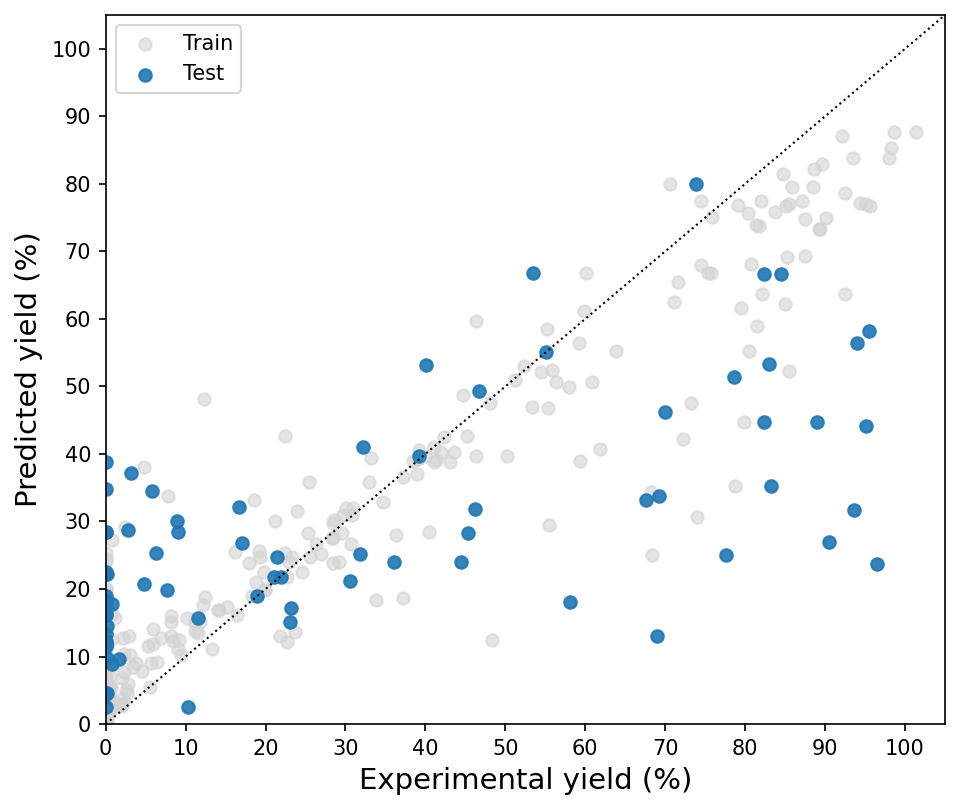

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_model = best_rf_refined_noboot

# Predictions
y_train_pred = inv_azo(best_model.predict(X_train_pca))
y_test_pred  = inv_azo(best_model.predict(X_test_pca))

y_train_true = inv_azo(y_train_azo_scaled)
y_test_true  = inv_azo(y_test_azo_scaled)

# Metrics (test only)
r2 = r2_score(y_test_true, y_test_pred)
mae = mean_absolute_error(y_test_true, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

# -----------------------
# Predicted vs Experimental
# -----------------------
plt.figure(figsize=(6.5, 5.5), dpi=150)

# Train
plt.scatter(
    y_train_true, y_train_pred,
    color="lightgray", alpha=0.6, label="Train"
)

# Test
plt.scatter(
    y_test_true, y_test_pred,
    color="tab:blue", alpha=0.9, label="Test"
)

# 1:1 line
lims = [0, 105]
plt.plot(lims, lims, "k:", lw=1)

plt.xlim(lims)
plt.ylim(lims)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

plt.xlabel("Experimental yield (%)", fontsize=14)
plt.ylabel("Predicted yield (%)", fontsize=14)

#plt.text(
#    0.02, 0.98,
#    f"Test R² = {r2:.2f}\nMAE = {mae:.1f}\nRMSE = {rmse:.1f}",
#    transform=plt.gca().transAxes,
#    va="top", ha="left"
#)

plt.legend(frameon=True)
plt.tight_layout()
plt.show()


In [41]:
# Random Forest on RFECV feature space (predict azo yields)

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RANDOM_STATE = 42
TEST_SIZE = 0.20
N_JOBS = -1


X_rfe = X_final_azo.values
y_azo_scaled_all = df_X_knn_scaled["Azo Yield"].values

# train/test split
X_train_rfe, X_test_rfe, y_train_azo_scaled_rfe, y_test_azo_scaled_rfe = train_test_split(
    X_rfe,
    y_azo_scaled_all,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    shuffle=True
)

# inverse scaling
azo_idx = df_X_knn_scaled.columns.get_loc("Azo Yield")
y_mean_azo = float(x_scaler.mean_[azo_idx])
y_std_azo = float(x_scaler.scale_[azo_idx])

def inv_azo(y_scaled):
    return y_scaled * y_std_azo + y_mean_azo

# random forest
rf_rfe = RandomForestRegressor(
    n_estimators=1000,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

# 5-fold CV on training set
cv5_rfe = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    "r2": "r2",
    "neg_mae": "neg_mean_absolute_error",
    "neg_rmse": "neg_root_mean_squared_error",
}

cv_results = cross_validate(
    rf_rfe,
    X_train_rfe,
    y_train_azo_scaled_rfe,
    cv=cv5_rfe,
    scoring=scoring,
    n_jobs=N_JOBS
)

print("5-fold CV (train split only, SCALED):")
print(f"  R2   : {cv_results['test_r2'].mean():.3f} ± {cv_results['test_r2'].std():.3f}")
print(f"  MAE  : {-cv_results['test_neg_mae'].mean():.3f} ± {(-cv_results['test_neg_mae']).std():.3f}")
print(f"  RMSE : {-cv_results['test_neg_rmse'].mean():.3f} ± {(-cv_results['test_neg_rmse']).std():.3f}")

# fit + held-out test evaluation
rf_rfe.fit(X_train_rfe, y_train_azo_scaled_rfe)
y_pred_test_scaled_rfe = rf_rfe.predict(X_test_rfe)

y_test_real_rfe = inv_azo(y_test_azo_scaled_rfe)
y_pred_real_rfe = inv_azo(y_pred_test_scaled_rfe)

r2 = r2_score(y_test_real_rfe, y_pred_real_rfe)
mae = mean_absolute_error(y_test_real_rfe, y_pred_real_rfe)
rmse = np.sqrt(mean_squared_error(y_test_real_rfe, y_pred_real_rfe))

print("\nHeld-out test set (REAL units):")
print(f"  MAE  : {mae:.3f}")
print(f"  RMSE : {rmse:.3f}")
print(f"  R2   : {r2:.3f}")

5-fold CV (train split only, SCALED):
  R2   : 0.495 ± 0.129
  MAE  : 0.474 ± 0.021
  RMSE : 0.664 ± 0.038

Held-out test set (REAL units):
  MAE  : 15.961
  RMSE : 23.147
  R2   : 0.533


In [42]:
# Coarse random forest parameter search

import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

RANDOM_STATE = 42
N_JOBS = -1


# random forest
rf_base_rfe = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

# parameter search space
param_dist_rfe = {
    "n_estimators": [1000],
    "max_depth": [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["sqrt", "log2", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

cv5_rfe = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

search_rf_rfe = RandomizedSearchCV(
    estimator=rf_base_rfe,
    param_distributions=param_dist_rfe,
    n_iter=40,
    scoring=rmse_scorer,
    cv=cv5_rfe,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    return_train_score=True,
    refit=True
)

search_rf_rfe.fit(X_train_rfe, y_train_azo_scaled_rfe)

print("Best parameters (RFE feature space):")
print(search_rf_rfe.best_params_)

print("\nBest 5-fold CV RMSE (train split only, SCALED units):")
print(-search_rf_rfe.best_score_)

rf_best_rfe = search_rf_rfe.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters (RFE feature space):
{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.9, 'max_depth': 15}

Best 5-fold CV RMSE (train split only, SCALED units):
0.6593003118524967


In [43]:
# Summarise results of coarse search

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_rf_rfe = search_rf_rfe.best_estimator_

# predict in scaled space
y_pred_test_scaled_rfe = best_rf_rfe.predict(X_test_rfe)

# inverse-scale to real units
y_pred_real_rfe = inv_azo(y_pred_test_scaled_rfe)
y_test_real_rfe = inv_azo(y_test_azo_scaled_rfe)

print("\nTuned RF performance (RFE feature space) — held-out test set (REAL units):")
print(f"  MAE  : {mean_absolute_error(y_test_real_rfe, y_pred_real_rfe):.3f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test_real_rfe, y_pred_real_rfe)):.3f}")
print(f"  R2   : {r2_score(y_test_real_rfe, y_pred_real_rfe):.3f}")


Tuned RF performance (RFE feature space) — held-out test set (REAL units):
  MAE  : 16.258
  RMSE : 23.373
  R2   : 0.524


In [44]:
# Refined random forest parameter search (local around current best)
# Includes bootstrapping

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

RANDOM_STATE = 42
N_JOBS = -1

cv5_rfe = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

rf_base_rfe_refined = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

param_dist_refined_rfe_boot = {
    "n_estimators": [1000],
    "max_depth": [None, 15, 20, 25, 30, 35, 40],
    "min_samples_leaf": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 16],
    "max_features": ["sqrt", "log2", 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0],
    "bootstrap": [True],
    "max_samples": [0.6, 0.7, 0.8, 0.9, None],
    "ccp_alpha": [0.0, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3],
    "criterion": ["squared_error"],
}

search_rf_refined_rfe_boot = RandomizedSearchCV(
    estimator=rf_base_rfe_refined,
    param_distributions=param_dist_refined_rfe_boot,
    n_iter=150,
    scoring=rmse_scorer,
    cv=cv5_rfe,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    refit=True
)

search_rf_refined_rfe_boot.fit(X_train_rfe, y_train_azo_scaled_rfe)

print("\nBest parameters (refined search, RFE features, bootstrap):")
print(search_rf_refined_rfe_boot.best_params_)

print("\nBest CV RMSE (train split only, SCALED units):")
print(-search_rf_refined_rfe_boot.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters (refined search, RFE features, bootstrap):
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 0.8, 'max_features': 0.6, 'max_depth': None, 'criterion': 'squared_error', 'ccp_alpha': 1e-06, 'bootstrap': True}

Best CV RMSE (train split only, SCALED units):
0.6584966664701143


In [45]:
# Evaluate refined RF (RFE-selected feature space) — held-out test set

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_rf_refined_rfe_boot = search_rf_refined_rfe_boot.best_estimator_

# predict (scaled units)
y_pred_test_scaled_rfe_boot = best_rf_refined_rfe_boot.predict(X_test_rfe)

# inverse scaling (real units)
y_pred_real_rfe_boot = inv_azo(y_pred_test_scaled_rfe_boot)
y_test_real_rfe = inv_azo(y_test_azo_scaled_rfe)

print("\nRefined tuned RF performance (RFE feature space, bootstrap) — held-out test (REAL units):")
print(f"  R2   : {r2_score(y_test_real_rfe, y_pred_real_rfe_boot):.3f}")
print(f"  MAE  : {mean_absolute_error(y_test_real_rfe, y_pred_real_rfe_boot):.3f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test_real_rfe, y_pred_real_rfe_boot)):.3f}")



Refined tuned RF performance (RFE feature space, bootstrap) — held-out test (REAL units):
  R2   : 0.515
  MAE  : 16.446
  RMSE : 23.582


In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# best model from refined search
best_rf_refined_rfe_boot = search_rf_refined_rfe_boot.best_estimator_

mae_folds, rmse_folds, r2_folds = [], [], []

for tr_idx, val_idx in cv5_rfe.split(X_train_rfe):
    X_tr, X_val = X_train_rfe[tr_idx], X_train_rfe[val_idx]
    y_tr, y_val = y_train_azo_scaled_rfe[tr_idx], y_train_azo_scaled_rfe[val_idx]

    best_rf_refined_rfe_boot.fit(X_tr, y_tr)
    y_pred_scaled = best_rf_refined_rfe_boot.predict(X_val)

    # inverse scaling
    y_pred = inv_azo(y_pred_scaled)
    y_true = inv_azo(y_val)

    mae_folds.append(mean_absolute_error(y_true, y_pred))
    rmse_folds.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2_folds.append(r2_score(y_true, y_pred))

mae_folds = np.array(mae_folds)
rmse_folds = np.array(rmse_folds)
r2_folds = np.array(r2_folds)

# mean ± SEM (recommended for reporting)
print("\nCross-validated performance (REAL units) — refined RF (RFE) (bootstrap):")
print(f"MAE  : {mae_folds.mean():.3f} ± {mae_folds.std(ddof=1)/np.sqrt(len(mae_folds)):.3f}")
print(f"RMSE : {rmse_folds.mean():.3f} ± {rmse_folds.std(ddof=1)/np.sqrt(len(rmse_folds)):.3f}")
print(f"R2   : {r2_folds.mean():.3f} ± {r2_folds.std(ddof=1)/np.sqrt(len(r2_folds)):.3f}")


Cross-validated performance (REAL units) — refined RF (RFE) (bootstrap):
MAE  : 15.407 ± 0.369
RMSE : 21.390 ± 0.638
R2   : 0.504 ± 0.064


In [47]:
# Refined random forest parameter search (local around current best)
# Discludes bootstrapping

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

RANDOM_STATE = 42
N_JOBS = -1

cv5_rfe = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rmse_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=False
)

rf_base_rfe_refined = RandomForestRegressor(
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS
)

param_dist_refined_rfe_noboot = {
    "n_estimators": [1000],
    "max_depth": [None, 15, 20, 25, 30, 35, 40],
    "min_samples_leaf": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 16],
    "max_features": ["sqrt", "log2", 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0],
    "bootstrap": [False],
    "ccp_alpha": [0.0, 1e-6, 1e-5, 1e-4, 5e-4, 1e-3],
    "criterion": ["squared_error"],
}

search_rf_refined_rfe_noboot = RandomizedSearchCV(
    estimator=rf_base_rfe_refined,
    param_distributions=param_dist_refined_rfe_noboot,
    n_iter=150,
    scoring=rmse_scorer,
    cv=cv5_rfe,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=1,
    refit=True
)

search_rf_refined_rfe_noboot.fit(X_train_rfe, y_train_azo_scaled_rfe)

print("\nBest parameters (refined search, RFE features, NO bootstrap):")
print(search_rf_refined_rfe_noboot.best_params_)

print("\nBest CV RMSE (train split only, SCALED units):")
print(-search_rf_refined_rfe_noboot.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters (refined search, RFE features, NO bootstrap):
{'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'squared_error', 'ccp_alpha': 0.001, 'bootstrap': False}

Best CV RMSE (train split only, SCALED units):
0.6609268307928208


In [48]:
# Evaluate refined RF (RFE-selected feature space) — held-out test set

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_rf_refined_rfe_noboot = search_rf_refined_rfe_noboot.best_estimator_

# predict (scaled units)
y_pred_test_scaled_rfe_noboot = best_rf_refined_rfe_noboot.predict(X_test_rfe)

# inverse scaling (real units)
y_pred_real_rfe_noboot = inv_azo(y_pred_test_scaled_rfe_noboot)
y_test_real_rfe = inv_azo(y_test_azo_scaled_rfe)

print("\nRefined tuned RF performance (RFE feature space, no bootstrap) — held-out test (REAL units):")
print(f"  R2   : {r2_score(y_test_real_rfe, y_pred_real_rfe_noboot):.3f}")
print(f"  MAE  : {mean_absolute_error(y_test_real_rfe, y_pred_real_rfe_noboot):.3f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test_real_rfe, y_pred_real_rfe_noboot)):.3f}")


Refined tuned RF performance (RFE feature space, no bootstrap) — held-out test (REAL units):
  R2   : 0.510
  MAE  : 16.061
  RMSE : 23.696


In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# best model from refined search (no bootstrapping)
best_rf_refined_rfe_noboot = search_rf_refined_rfe_noboot.best_estimator_

mae_folds, rmse_folds, r2_folds = [], [], []

for tr_idx, val_idx in cv5_rfe.split(X_train_rfe):
    X_tr, X_val = X_train_rfe[tr_idx], X_train_rfe[val_idx]
    y_tr, y_val = y_train_azo_scaled_rfe[tr_idx], y_train_azo_scaled_rfe[val_idx]

    best_rf_refined_rfe_noboot.fit(X_tr, y_tr)
    y_pred_scaled = best_rf_refined_rfe_noboot.predict(X_val)

    # inverse scaling
    y_pred = inv_azo(y_pred_scaled)
    y_true = inv_azo(y_val)

    mae_folds.append(mean_absolute_error(y_true, y_pred))
    rmse_folds.append(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2_folds.append(r2_score(y_true, y_pred))

mae_folds = np.array(mae_folds)
rmse_folds = np.array(rmse_folds)
r2_folds = np.array(r2_folds)

# mean ± SEM (recommended for reporting)
print("\nCross-validated performance (REAL units) — refined RF (RFE) (no bootstrap):")
print(f"MAE  : {mae_folds.mean():.3f} ± {mae_folds.std(ddof=1)/np.sqrt(len(mae_folds)):.3f}")
print(f"RMSE : {rmse_folds.mean():.3f} ± {rmse_folds.std(ddof=1)/np.sqrt(len(rmse_folds)):.3f}")
print(f"R2   : {r2_folds.mean():.3f} ± {r2_folds.std(ddof=1)/np.sqrt(len(r2_folds)):.3f}")


Cross-validated performance (REAL units) — refined RF (RFE) (no bootstrap):
MAE  : 15.068 ± 0.342
RMSE : 21.469 ± 0.444
R2   : 0.501 ± 0.062


C:\Users\hamis\AppData\Local\Temp\ipykernel_2272\2723452929.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k:" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(lims, lims, "k:", lw=1, linestyle=":")


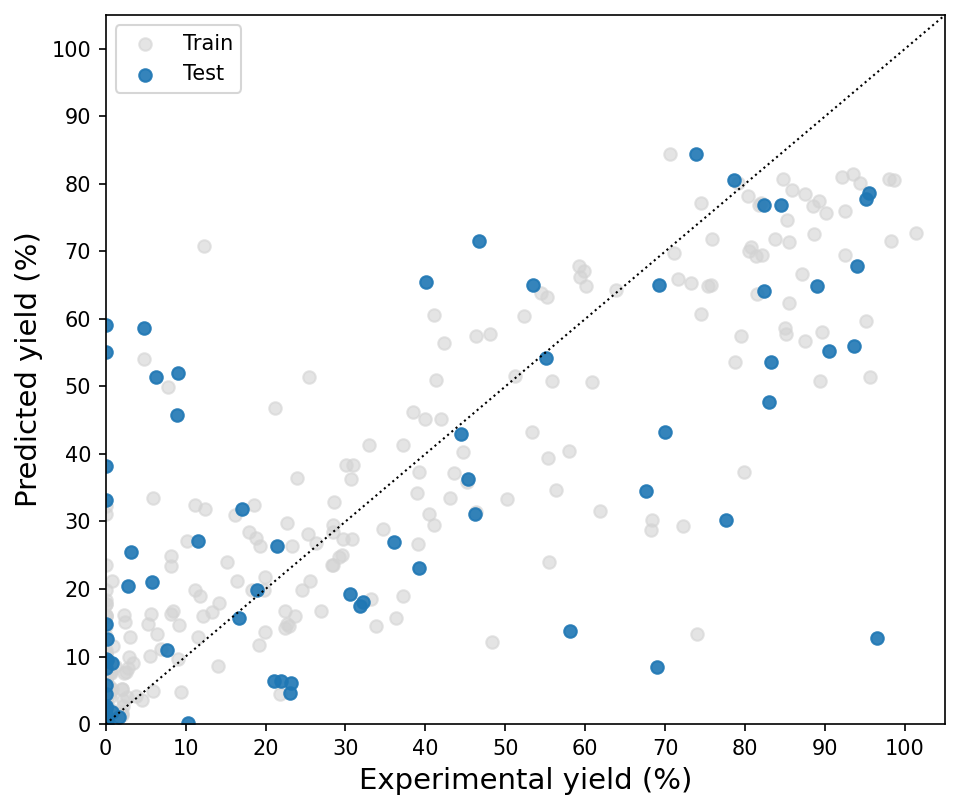

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

best_model_rfe_boot = search_rf_refined_rfe_boot.best_estimator_

# Predictions (RFE feature space)
y_train_pred = inv_azo(best_model_rfe_boot.predict(X_train_rfe))
y_test_pred  = inv_azo(best_model_rfe_boot.predict(X_test_rfe))

y_train_true = inv_azo(y_train_azo_scaled_rfe)
y_test_true  = inv_azo(y_test_azo_scaled_rfe)

# Metrics (test only)
r2 = r2_score(y_test_true, y_test_pred)
mae = mean_absolute_error(y_test_true, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))

# -----------------------
# Predicted vs Experimental
# -----------------------
plt.figure(figsize=(6.5, 5.5), dpi=150)

# Train
plt.scatter(
    y_train_true, y_train_pred,
    color="lightgray", alpha=0.6, label="Train"
)

# Test
plt.scatter(
    y_test_true, y_test_pred,
    color="tab:blue", alpha=0.9, label="Test"
)

# 1:1 line
lims = [0, 105]
plt.plot(lims, lims, "k:", lw=1, linestyle=":")

plt.xlim(lims)
plt.ylim(lims)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))

plt.xlabel("Experimental yield (%)", fontsize=14)
plt.ylabel("Predicted yield (%)", fontsize=14)

#plt.text(
#    0.02, 0.98,
#    f"Test R² = {r2:.2f}\nMAE = {mae:.1f}\nRMSE = {rmse:.1f}",
#    transform=plt.gca().transAxes,
#    va="top", ha="left"
#)

plt.legend(frameon=True)
plt.tight_layout()
plt.show()